## Введение

*«Стримчик» - интернет-магазин,который продаёт по всему миру компьютерные игры.  
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
В датасете представлены данные 2016 года. Необходимо спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Импорт основных инструментов

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Ссылка на первоисточник: [Kaggle Dataset](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

In [4]:
#создание датасета
games = pd.read_csv('/datasets/games.csv')

In [5]:
#исходный датасет
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#dataset info
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Функции

In [7]:
# подсчет пропущенных значения 
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (21,6), rot = 0, legend = False, fontsize = 16,edgecolor = 'black',linewidth=2, grid = True)
            .set_title('Пропущенные значения' + "\n", fontsize = 22)    
        )
        plt.xlabel('Проценты', fontsize = xc*2);    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

## Предобработка

### Преобразования

**Задачи:**
- [x] Заменить названия столбцов (привести к нижнему регистру);
- [x] Преобразовать данные в нужные типы(в каких столбцах изменился тип данных и почему);
- [x] Обработать пропуски при необходимости:
- [x] Объяснить, почему пропуски заполнены определённым образом или почему не заполнены;
- [x] Описать причины, которые могли привести к пропускам;
- [x] Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
- [x] Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**Преобразуем названия столбцов к нижнему регистру с помощью lower() и проверим результат**

In [8]:
#lowercase
games.columns = games.columns.str.lower()

In [9]:
# первые 5 строк
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Теперь проанализируем содержание столбцов и их типы данных для дальнейших корректировок**

In [10]:
#данные по столбцам
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Год выпуска представлен типом float64, логично заменить его на Int64  
Столбец user_score имеет тип object, что связано с наличием в нём значений tbd, поэтому вернемся к нему позже

In [11]:
#заменим тип для столбца с годом
games['year_of_release'] = games['year_of_release'].astype('Int64', errors = 'ignore')

In [12]:
#проверка
games.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Сохраним исходный размер датасета в отдельную переменную

In [13]:
#исходный размер датасета
games_size = games.shape[0]

Проверим на всякий случай наличие явных дубликатов

In [14]:
#явные дубликаты
games.loc[games[['platform','name']].duplicated(keep = False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По результатам видно, что игра Madden NFL 13 имеет дубликат, в котором прктически нет продаж.  
У Need for Speed два варианта издания для двух платформ, при этом есть перевыпуски в другой год. Оставим эти строки нетронутыми.
Sonic имеет возмонжый дубликат с неизвестным годом издания, у него есть продажи в Европейском регионе, причем они выше чем у аналогичной строки в 2006 году. Такую строку следует оставить.  
Две безыменные игры на GEN будут удалены в ходе обработки пропусков.

In [15]:
#удаление строки
games.drop(labels = 16230,axis = 0, inplace = True)

In [16]:
#Проверка удаления
games.loc[games[['platform','name']].duplicated(keep = False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


### Обработка пропусков

**Рассмотрим количество пропусков в датасете и построим график**

пропусков не осталось :) или произошла ошибка в первой части функции 


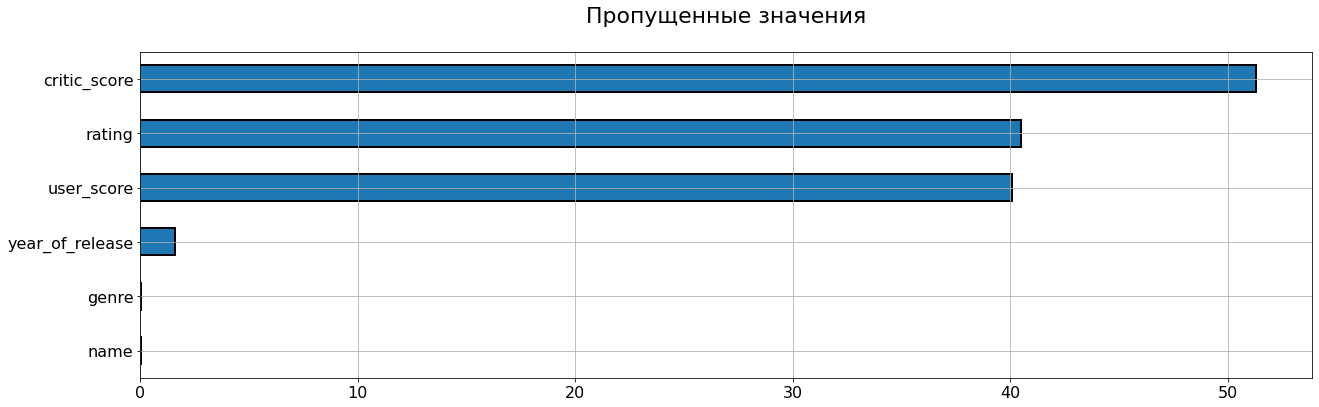

In [17]:
#визуализация пропусков в датафрейме
pass_value_barh(games)

In [18]:
#количество пропусков по столбцам
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [19]:
#количество пропусков по столбцам в процентах
games.isna().mean()*100

name                0.011966
platform            0.000000
year_of_release     1.609429
genre               0.011966
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.322245
user_score         40.092138
rating             40.481034
dtype: float64

В столбце с оценками критиков более 50% процентов пропусков, в столбце рейтинга и оценок пользователей около 40%.  
В столбце с годом выпуска около 2% пропусков, и несколько значений в столбцах name и genre.  
>name и genre имеют одинаковое количество пропусков, скорее всего они принадлежат одним и тем же строкам

**Изучим пропуски повнимательнее, пойдём по порядку сверху вниз. Первым на очереди идёт столбец с названием игры**

In [20]:
#пропуски в name
games.loc[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Поскольку таких пропуска всего два смело удалим их

In [21]:
# удаляем пропуски в столбце с названием
games = games.dropna(subset = ['name'])

**Далее на очереди столбец с годом выпуска, в котором 269 пропусков. Расммотрим его поближе**

In [22]:
# строки с пропусами в столбце с годом релиза
games.loc[games['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Можно увидеть, что в некоторых названиях присутствует год (например, *Madden NFL 2004*).  
Однако это не гарантирует на 100%, что игра была выпущена именно в этот год.  
(например, всё та же *Madden NFL 2004* была выпущена 12 августа 2003 г.)  
В ходе дальнейшего исследования будет проводиться группировка по годам и такое небольшое количество пропусков не сильно повредит общей статистике. Оставим данный столбец без изменений  

**Далее по списку идет столбец с жанром. Пропуски в нем были удалены на этапе обработки названия игры.  
Поэтому далее идёт столбец с оценками критиков - в нем больше всего пропусков**

In [23]:
#показатели столбца с оценками критиков
games['critic_score'].describe()

count    8136.000000
mean       68.965954
std        13.938153
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

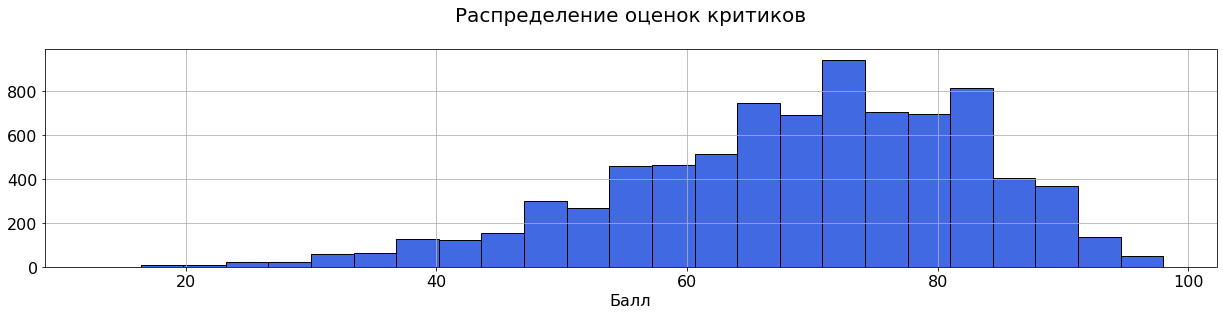

In [25]:
#график распределения оценок 
(
    games['critic_score']
    .plot(
        kind = 'hist', 
        bins = 25, 
        figsize = (21,4), 
        rot = 0, 
        legend = False, 
        fontsize = 16, 
        edgecolor = 'black',
        color='royalblue',
        grid = True).set_title('Распределение оценок критиков' + "\n", fontsize = 20)
)
plt.xlabel('Балл', fontsize = 16)
plt.ylabel('');

По графику видно, что в целом распределение носит нормальный характер.  
Медиана и среднее лежат близко друг к другу - 71 и 68.9 соотвественно.  
Оценок выше 100 не наблюдается  
Рассмотрим пропуски в оценках по годам

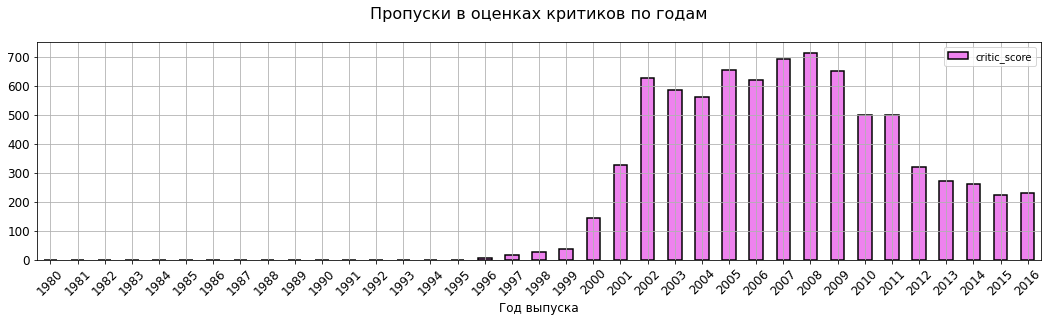

In [26]:
#график распределения количества оценок критиков по годам
(
    games.groupby('year_of_release').count().plot(
        y = 'critic_score',    
        figsize = (18,4), 
        fontsize = 12,
        kind = 'bar',
        grid = True,
        edgecolor = 'black',
        linewidth = 1.5,
        rot = 45,
        color='violet'
    ).set_title('Пропуски в оценках критиков по годам' + "\n", fontsize = 16)
)
plt.xlabel('Год выпуска', fontsize = 12);

Из графика мы видим, что до 1996 года много пустых столбцов, посмотрим на пропуски в группировке по платформам

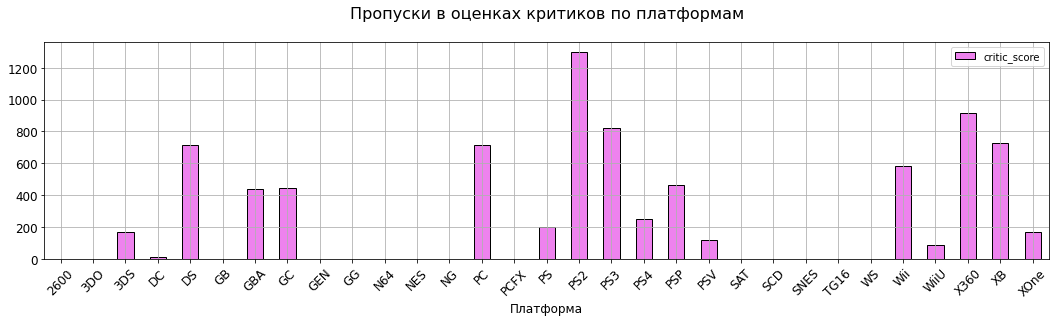

In [27]:
#график распределения количества оценок критиков по платформам
(
    games.groupby('platform').count().plot(
        y = 'critic_score',    
        figsize = (18,4), 
        fontsize = 12,
        kind = 'bar',
        grid = True,
        edgecolor = 'black',
        rot = 45,
        color='violet'
    ).set_title('Пропуски в оценках критиков по платформам' + "\n", fontsize = 16)
)
plt.xlabel('Платформа', fontsize = 12);

Платформы, в которых присутсвуют пропуски выпускались приблизительно в те же года, где и были видны пропуски на графике выше, то есть до 1995-2000 годов.  
Вероятнее всего такие пропуски связаны с малым количеством игровых изданий и критиков, а также с малым количеством игроков и покупателей в те года.  
Заполнение пропусков искусственными методами могут существенно исказить общую картину, поскольку игровой рынок до 2000х годов и после - абсолютно разные.  
Заполнение таких пропусков значением 0 также существенно исказит картину.  
**Оставляем столбец без изменений.**

**Рассмотрим столбец с оценками игроков**

In [28]:
#уникальные значения столбца с оценками критиков
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [29]:
#значения tbd
games.loc[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Значение "tbd" встречается 2424 раза в столбце, рассмотрим общее число пропусков

In [30]:
#пропуски в столбце с оценками критиков
games['user_score'].isna().sum()

6699

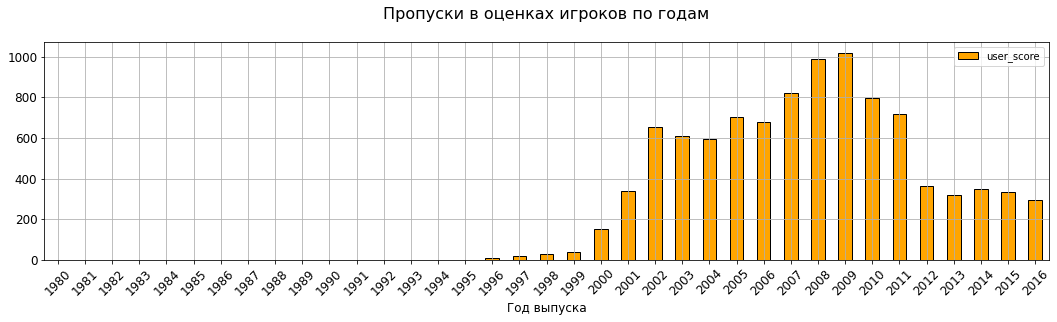

In [31]:
#график распределения количества оценок игроков по годам
games.groupby('year_of_release').count().plot(
        y = 'user_score',    
        figsize = (18,4), 
        fontsize = 12,
        kind = 'bar',
        grid = True,
        edgecolor = 'black',
        rot = 45,
        color='orange'
    ).set_title('Пропуски в оценках игроков по годам' + "\n", fontsize = 16)
plt.xlabel('Год выпуска', fontsize = 12);

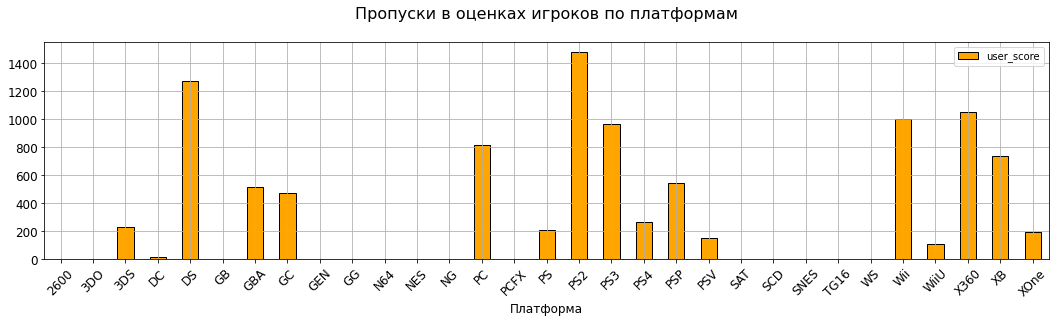

In [32]:
#график распределения количества оценок игроков по платформам
(
    games.groupby('platform').count().plot(
        y = 'user_score',    
        figsize = (18,4), 
        fontsize = 12,
        kind = 'bar',
        grid = True,
        edgecolor = 'black',
        rot = 45,
        color='orange'
    ).set_title('Пропуски в оценках игроков по платформам' + "\n", fontsize = 16)
)
plt.xlabel('Платформа', fontsize = 12);

Распределения оценок игроков по платформам и годам практически полностью повторяют такие же распределения у оценок критиков.  
Это косвенно подтверждает предположение о том, что до 2000х годов было слабо развито игровое сообщество, а системы агрегирования оценок игроков и критиков либо не было как таковой, либо она была в зачаточном состоянии.  
По аналогии с предудыщими оценками считаю целесообразным не заполнять такие пропуски синтетическими значениями дабы не потерять качественную картину в данных.  
**Оставляем столбец в исходном состоянии**

### Значение tbd в оценках пользователей

В столбце присутствует значение "tbd", с которым по заданию нужно поработать отдельно.  
Для начала разберемся, что это за аббревиатура и что она означает.

([Cambridge Dictionary](https://dictionary.cambridge.org/ru/%D1%81%D0%BB%D0%BE%D0%B2%D0%B0%D1%80%D1%8C/%D0%B0%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9/tbd
"Cambridge Dictionary"))
*to be decided or to be determined: used when something has not yet been decided or is not yet known*  
То есть данная аббревиатура говорит нам о том, что оценка пользователей ещё не выставлена окончательно и будет определена в будущем

Попробуем найти причину или какую-либо систематичность в появлении этого значения.  
Посмотрим на распределение этих значений по годам и платформам

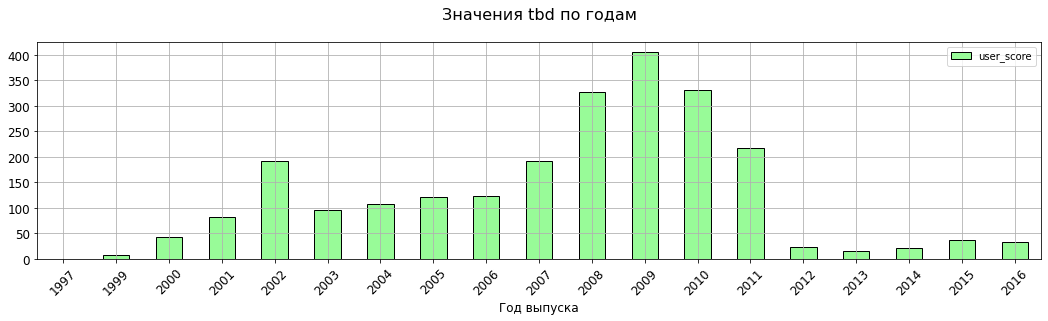

In [33]:
#столбчатая диаграмма для tbd по годам
(
    games.query('user_score == "tbd"').groupby('year_of_release').count().plot(
        y = 'user_score',    
        figsize = (18,4), 
        fontsize = 12,
        kind = 'bar',
        grid = True,
        edgecolor = 'black',
        rot = 45,
        color='palegreen'
    ).set_title('Значения tbd по годам' + "\n", fontsize = 16)
)
plt.xlabel('Год выпуска', fontsize = 12);

На графиках мы видим подъём таких значений с 2007 по 2009, а затем спад c 2009 по 2012. Далее значения распределились более-менее равномерно.  
До 1997 года таких значений не встречается, что согласуется с предыдущими выводами об оценках критиков и игроков.


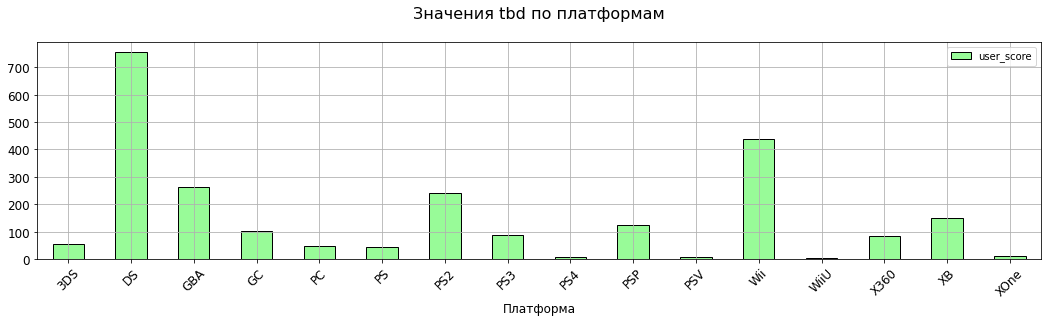

In [34]:
#столбчатая диаграмма для tbd по платформам
(
    games.query('user_score == "tbd"').groupby('platform').count().plot(
        y = 'user_score',    
        figsize = (18,4), 
        fontsize = 12,
        kind = 'bar',
        grid = True,
        edgecolor = 'black',
        rot = 45,
        color='palegreen'
    ).set_title('Значения tbd по платформам' + "\n", fontsize = 16)
)
plt.xlabel('Платформа', fontsize = 12);

Больше всего таких значений мы видим у платформ Nintendo DS, Wii, GameBoyAdvanced, а также у PS2.  
Все эти платформы представители японского рынка, которые относятся к компаниям Nintedo и Sony соотвественно.  
В то же время малое количество или вовсе отсутствие этих значений мы видим у PS4, PSV и WiiU, а также у XBox One. Все эти консоли появились в продаже в районе 2010-2015 годов.  

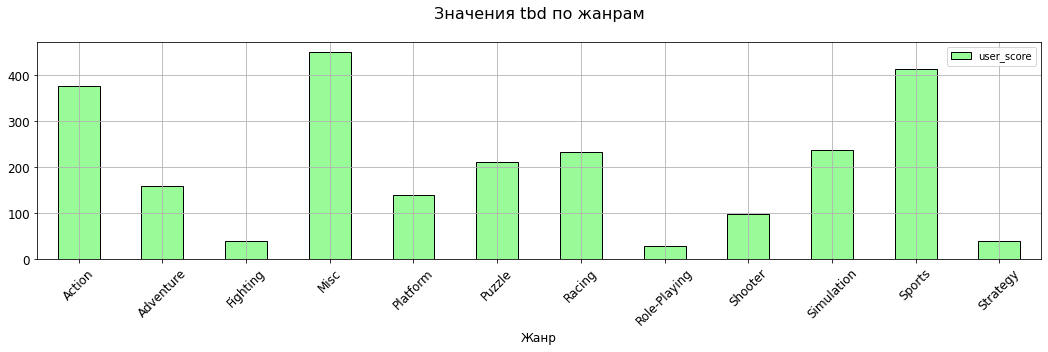

In [35]:
#столбчатая диаграмма для tbd по жанрам
(
    games.query('user_score == "tbd"').groupby('genre').count().plot(
        y = 'user_score',    
        figsize = (18,4), 
        fontsize = 12,
        kind = 'bar',
        grid = True,
        edgecolor = 'black',
        rot = 45,
        color = 'palegreen'
    ).set_title('Значения tbd по жанрам' + "\n", fontsize = 16)
)
plt.xlabel('Жанр', fontsize = 12);

На первом месте по наличию *tbd* находится жанр misc - miscellaneous, т.е. разнообразный, смешанный.  
Как правило это небольшие игры платформеры, аркады, индни-проекты, которые чаще выходят на платформах Nintendo, поскольку большая часть их консолей портативная.  
Далее идет жанр sports - спортивные симуляторы. Такие игры также достаточно популярны на портативных консолях и у их старших братьях вроде XBox и Sony

Теперь рассмотрим продажи игр с оценкой "tbd" по регионам

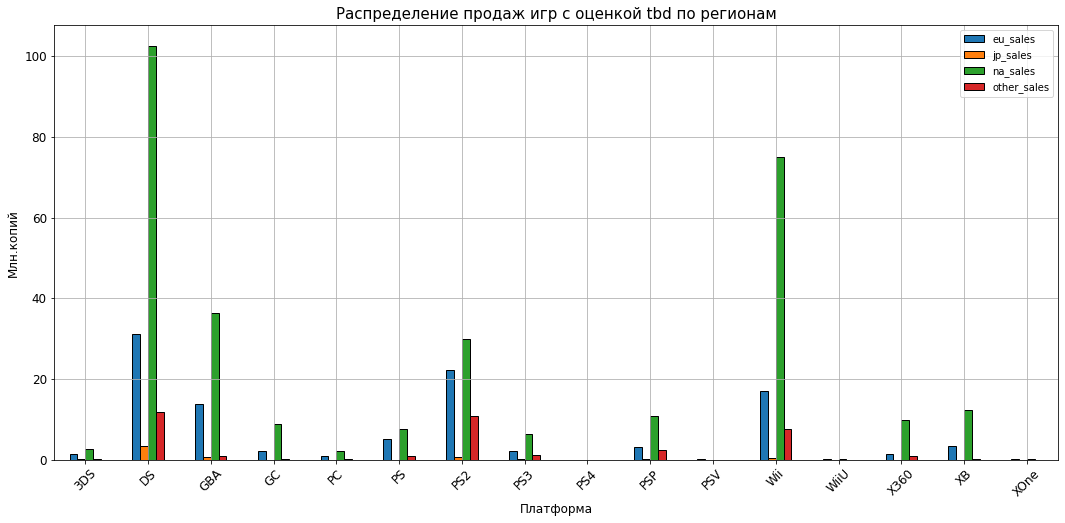

In [36]:
#столбчатая диаграмма с продажами по регионам
(
    games.query('user_score == "tbd"')
    .pivot_table(index = 'platform', values = ['na_sales','jp_sales','eu_sales','other_sales'], aggfunc = 'sum')
    .plot(
        kind = 'bar',
        figsize = (18,8), 
        fontsize = 12,
        grid = True,
        edgecolor = 'black',
        rot = 45
    ).set_title('Распределение продаж игр с оценкой tbd по регионам', fontsize = 15)
)
plt.xlabel('Платформа', fontsize = 12)
plt.ylabel('Млн.копий', fontsize = 12);

Посмотрим внимательнее изучить область спада, а также пик в 2002 году.

In [37]:
games.query('2007 <= year_of_release <= 2011').groupby('year_of_release').agg(['count','mean'])

na_sales           eu_sales           jp_sales            \
                   count      mean    count      mean    count      mean   
year_of_release                                                            
2007                1197  0.258889     1197  0.131846     1197  0.050368   
2008                1427  0.244352     1427  0.126938     1427  0.042221   
2009                1426  0.235309     1426  0.131795     1426  0.043401   
2010                1255  0.239562     1255  0.136590     1255  0.047402   
2011                1136  0.210202     1136  0.143460     1136  0.046717   

                other_sales           critic_score             
                      count      mean        count       mean  
year_of_release                                                
2007                   1197  0.064119          692  66.180636  
2008                   1427  0.057057          715  65.904895  
2009                   1426  0.051501          651  67.554531  
2010                   1255  0.046669          500  67.482000  
2011                   1136  0.046435          500  68.692000

In [38]:
games.query('year_of_release == 2002').groupby('year_of_release').agg(['count','mean'])

na_sales           eu_sales           jp_sales            \
                   count      mean    count      mean    count      mean   
year_of_release                                                            
2002                 829  0.260784      829  0.132388      829  0.050374   

                other_sales           critic_score             
                      count      mean        count       mean  
year_of_release                                                
2002                    829  0.032895          627  69.046252

**Вывод по tbd:**  
Значения tbd чаще встречаются на платформах японских производителей - Sony, Nintendo.  
Однако каких-либо явных зависимостей для заполнения пропусков найдено не было, поэтому принято решение заполнить tbd пропусками и оставить без изменений ввиду того, что заполнение искусственными методами также скорее всего навредит общим выводам и прогнозам.  
**Заменим tbd на NaN**

In [39]:
#замена tbd
games['user_score'] = games['user_score'].replace('tbd',np.nan)

In [40]:
#приведем тип данных
games['user_score'] = games['user_score'].astype('float64')

In [41]:
#првоерка заполнения
games['user_score'].isna().sum()

9123

**С учетом замены значения "tbd" на NaN теперь в нашем столбце 9123 пропуска.  
Оставим его в таком виде для дальнейшей работы**

### Рейтинг ESRB

**Рассмотрим столбец с рейтингом**

Прежде чем перейти к анализу данных в столбце необходимо разобраться с маркировкой рейтингов.  
Entertainment Software Rating Board (ESRB) - организация, которая присваивает играм определенный возрастной рейтинг.  
Ниже приведен список согласно Википедии ([ESRB](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board 
"ESRB"))
- **«EC»** («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры
- **«E»** («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults")
- **«E10+»** («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года
- **«T»** («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики
- **«M»** («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику
- **«AO»** («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое
- **«RP»** («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу
- **«RP 17+»** («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант

Из этой градации получаем, что у нас могут быть неявные дубликаты - значения рейтинга *E* эквивалентно значению *К-А*.  

Проверим данные в нашей таблице.

In [42]:
#проверка на наличие неявных дубликатов
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [43]:
#смотрим на количество неявных дубликатов
games['rating'].value_counts()

E       3989
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Дубликатов в списке всего 3 штуки, заменим их согласно определения рейтинга и проверим результат.

In [44]:
#замена дубликатов
games['rating'] = games['rating'].replace('K-A', 'E')


In [45]:
#проверяем результат
games['rating'].value_counts()

E       3992
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

**Согласно классификации ESRB мы можем заменить пропуски на рейтинг RP - т.е. оценка ожидается**

In [46]:
#замена пропусков
games['rating'] = games['rating'].fillna('RP')

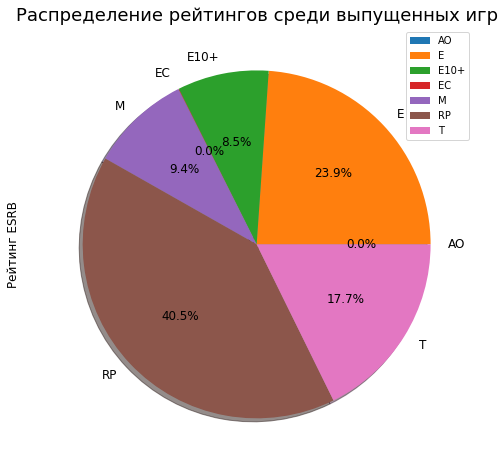

In [47]:
#распределение рейтингов
games.groupby('rating')['name'].count().plot(
    kind = 'pie',
    legend = True,
    fontsize = 12,
    figsize = (8,8),
    autopct='%1.1f%%',
    shadow = True
).set_title('Распределение рейтингов среди выпущенных игр', fontsize = 18)
plt.ylabel('Рейтинг ESRB'+"\n", fontsize = 12);

**После замены пропусков на рейтинг RP в столбце видим, что в столбце следующий ТОП-3 значений:**
- 40.5% игр ожидающих присвоение рейтинга(**"RP"**) 
- 23.9% игр для всех(**"E"**)
- 17.7% игр для подростков(**"T"**)  

Посмотрим на распределение без учета пропусков

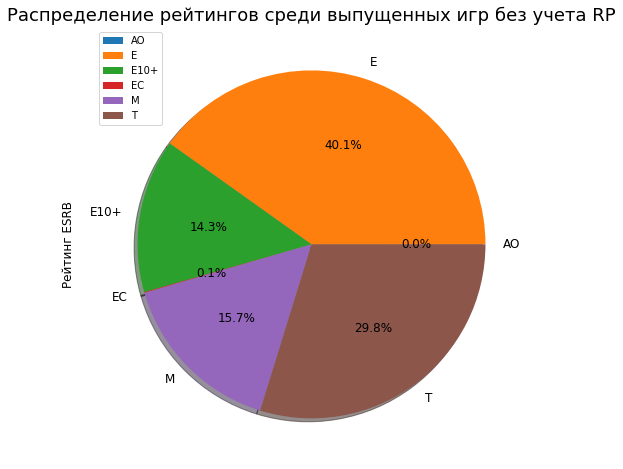

In [48]:
#распределение рейтингов
games.query('rating != "RP"').groupby('rating')['name'].count().plot(
    kind = 'pie',
    legend = True,
    fontsize = 12,
    figsize = (8,8),
    autopct='%1.1f%%',
    shadow = True
).set_title('Распределение рейтингов среди выпущенных игр без учета RP', fontsize = 18)
plt.ylabel('Рейтинг ESRB'+"\n", fontsize = 12);

**Без учета RP в столбце имеем следующий ТОП-3 значений:**
- 40.1% игр для всех(**"E"**)
- 29.8% игр для подростков(**"T"**)  
- 15.7% игр для взрослых (**"М"**) 

### Столбец с суммарными продажами

In [49]:
#Создаем стллбец с итоговым доходом
games['sum_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [50]:
# cмотрим на созданный столбец
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


In [51]:
#проверка корректности создания столбца
games['sum_sales'].isna().sum()

0

### Выводы

В ходе предобработки были получены следующие результаты:
- подготовили датасет к дальнейшей работе, привели названия столбцов к "змеиному" виду, нашли несколько явных дубликатов, изменили тип данных в столбце с годом релиза;
- проанализировали пропуски в столбцах с оценками, пришли к выводу оставить их как есть дабы не навредить дальнейшим выводам в ходе EDA;
- проанализировали природу появления значения 'tbd' в оценках пользователей, заменили его на NaN и оставили получившиеся пропуски нетронутыми;
- выявили дубликаты в рейтингах ESRB, провели соответствующие замены; 
- большая часть игр согласно этому рейтингу приходится на игры с рейтингом "Е" - для всех, "Т" - подростки и "М" - взрослые
- добавили столбец sum_sales с общей величиной продаж по всем регионам

## Исследовательский анализ

**Задачи:**
- [x] Выяснить, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x] Проанализировать изменение продаж по платформам
- [x] Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x] Изучить данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- [x] Выяснить, какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- [x] Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам, описать результат.
- [x] Изучить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- [x] Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- [x] Соотнести выводы с продажами игр на других платформах.
- [x] Рассмотреть общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Выпуск игр по годам

Рассмотрим количество выпущенных игр в период с 1980 по 2016 годы.  
Для этого посчитаем количество наименований без учета платформ, то есть в график попадут несколько вариантов одних и тех же игр, выпущенных на разных платформах

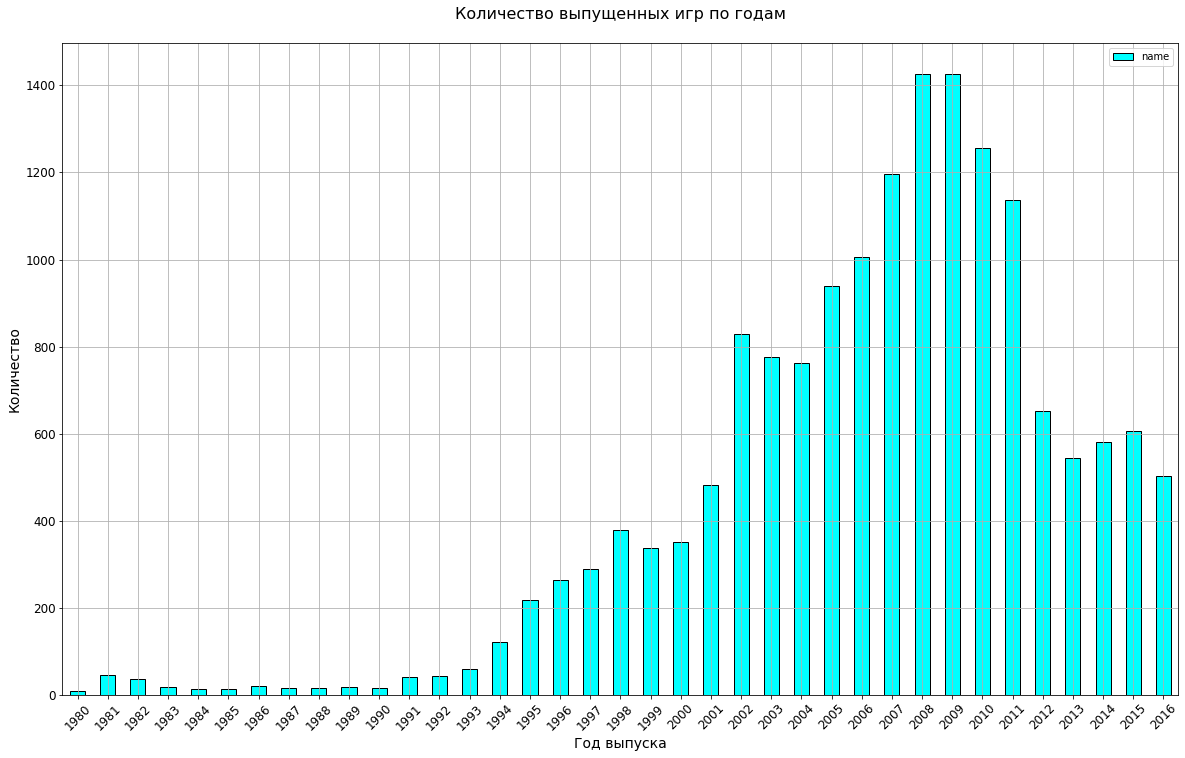

In [52]:
# распределение выпуска игр по годам на всех платформах
(
    games.groupby('year_of_release').count().plot(
        y = 'name',    
        figsize = (20,12), 
        fontsize = 12,
        kind = 'bar',
        grid = True,
        edgecolor = 'black',
        rot = 45,
        color = 'cyan',
    ).set_title('Количество выпущенных игр по годам' + "\n", fontsize = 16)
)
plt.xlabel('Год выпуска', fontsize = 14)
plt.ylabel('Количество', fontsize = 14);

После 2000-2002 года выпуск игр сильно вырос до пика в 2008-2009 годах.  
После этого выпуск спадал до 2012 года и далее вышел на плато(2013-2016 года).  
Вероятнее всего это связано с тем, что примерно в 2009-2012 годах были выпущены, либо анонсированы новые платформы и игры к ним.  
Это означает, что продажи игр на старые платформы просели, а продажи на новые платформы только набирают обороты, что и видно на графике.  
Для прогнозов на 2017 мы выберем лишь несколько лет, поскольку большой объём продаж, например, в 2008-2010 не означает такой же большой объём продаж в 2017 году, т.к. они зависят от большего числа факторов и в целом игровой рынок очень динамичен.  

### Изменение продаж по платформам

Рассмотрим продажи в разных регионах для разных платформ

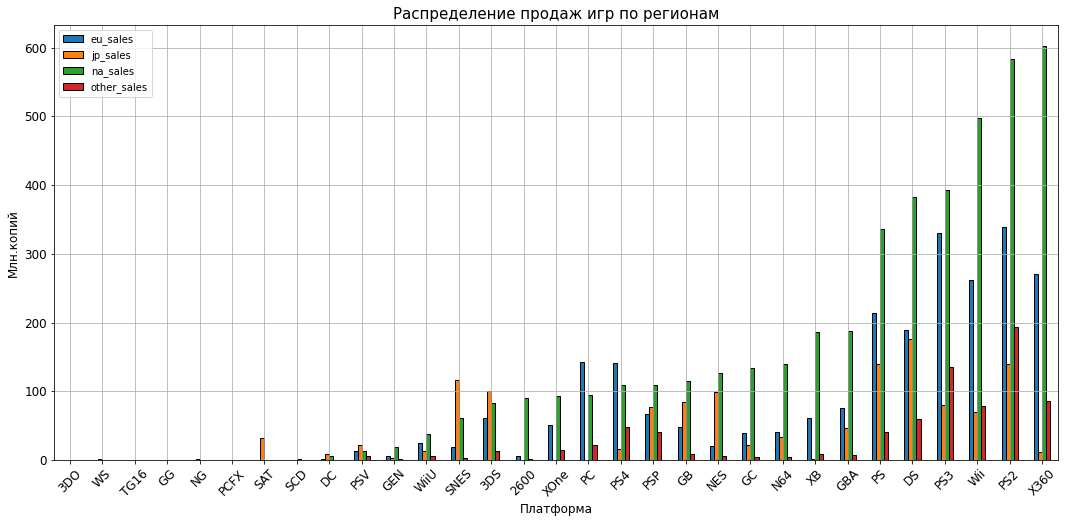

In [53]:
#изменение продаж по регионам
(
    games.pivot_table(index = ['platform'], values = ['na_sales','jp_sales','eu_sales','other_sales'], aggfunc = 'sum')
    .sort_values(by= 'na_sales').plot(
        kind = 'bar',
        figsize = (18,8), 
        fontsize = 12,
        grid = True,
        edgecolor = 'black',
        rot = 45,
    ).set_title('Распределение продаж игр по регионам', fontsize = 15)
)
plt.xlabel('Платформа', fontsize = 12)
plt.ylabel('Млн.копий', fontsize = 12);

Из графика мы видим, что в основном на всех платформах преобладают продажи в Северной Америке(na_sales), затем идут продажи в Европе(eu_sales).  
Япония в основном на третьем месте, не считая продаж для некоторых консолей японских производителей, где Япония лидирует.  
В Европе преобладают продажи PC

### Топ-платформы по суммарным продажам

Рассмотрим общее количество проданных копий по платформам в порядке возрастания

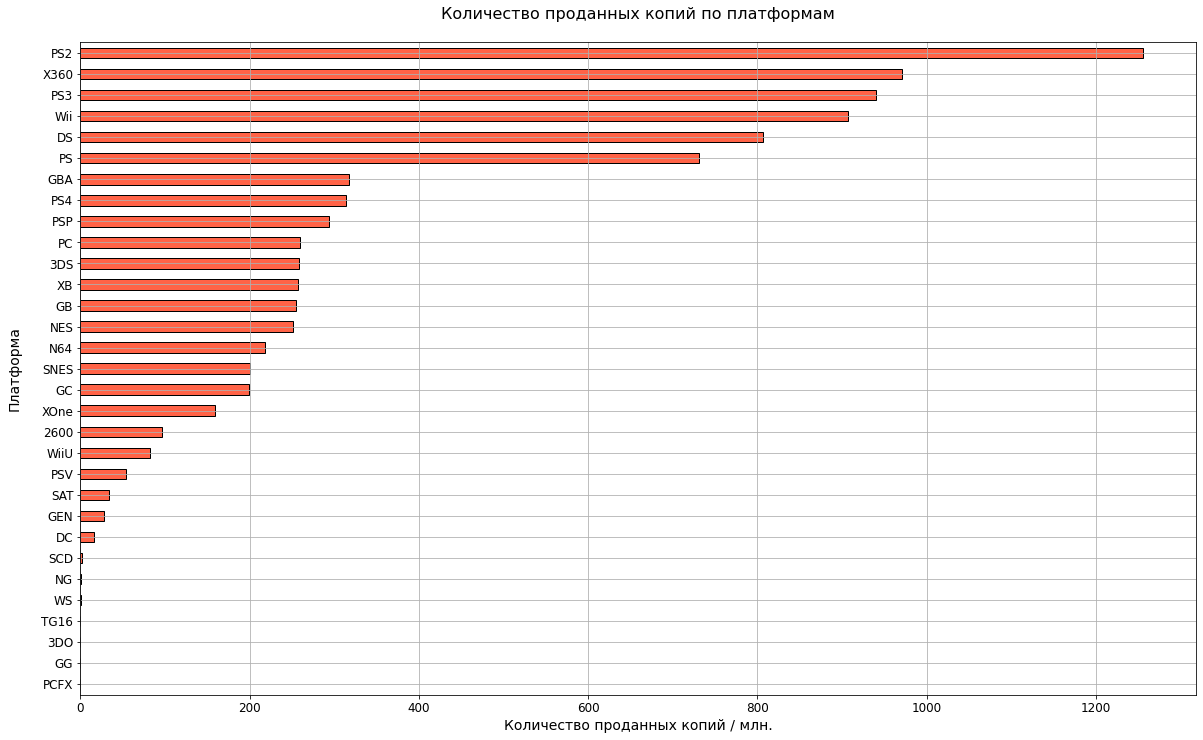

In [54]:
# распределение выпуска игр по платформам
(
    games.groupby('platform')['sum_sales'].sum().sort_values().plot(    
        figsize = (20,12), 
        fontsize = 12,
        kind = 'barh',
        grid = True,
        edgecolor = 'black',
        color = 'tomato'
    ).set_title('Количество проданных копий по платформам' + "\n", fontsize = 16)
)
plt.ylabel('Платформа'+"\n", fontsize = 14)
plt.xlabel('Количество проданных копий / млн.', fontsize = 14);

Выделим ТОП-10 платформ по суммарным продажам

In [55]:
#топ-10 платформ по числу проданных копий в млн.
(
    games.groupby('platform')['sum_sales']
    .sum()
    .sort_values(ascending=False).head(10)
)

platform
PS2     1255.77
X360     971.42
PS3      939.64
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sum_sales, dtype: float64

Особое внимание стоит обратить на то, что разные платформы представляют собой разные поколения и форм-факторы.  
Например, PSP и DS - портативные консоли, а PS2 консоль предыдущего поколения по сравнению с PS3 или XBox360.  

Построим распределение по годам для ТОП-10.

In [56]:
#список с платформами топ-10
top_10_platforms = ['PS2','X360','PS3','Wii','DS','PS','GBA','PS4','PSP','PC']

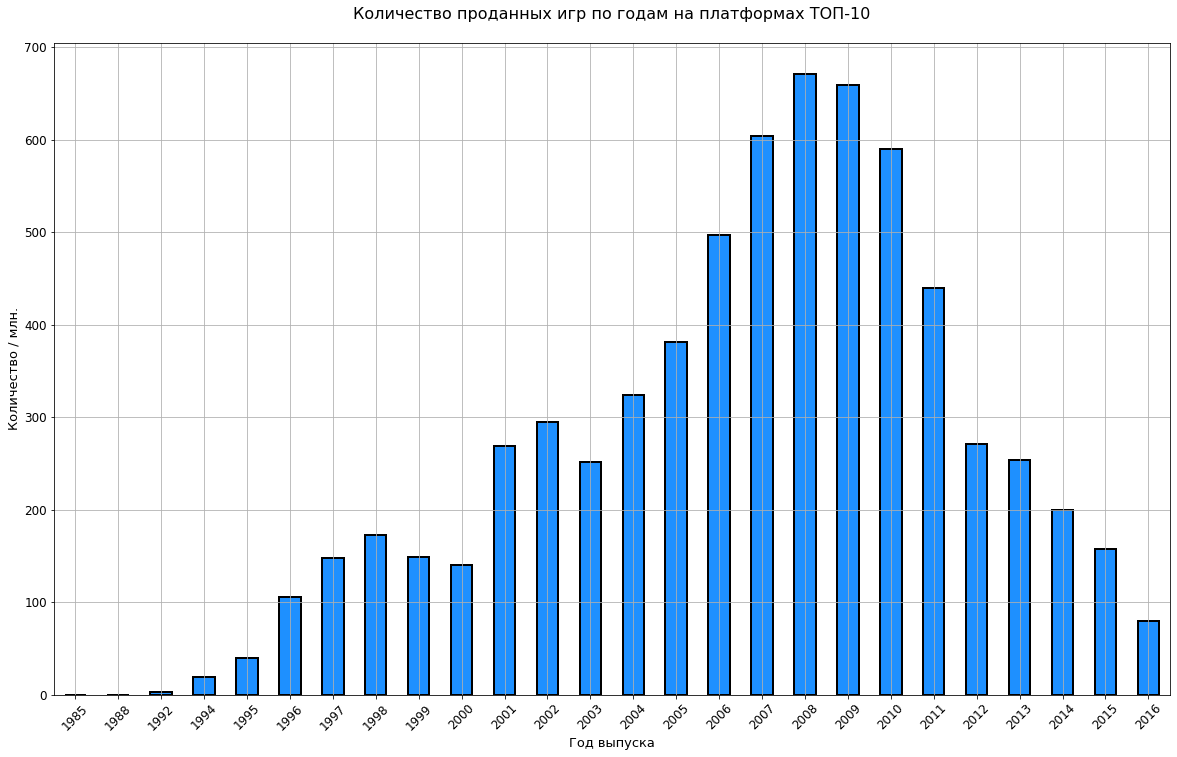

In [57]:
#столбчатая диаграмма для продаж ТОП-10
(
    games.query('platform in @top_10_platforms').groupby('year_of_release')['sum_sales'].sum().plot(  
        figsize = (20,12), 
        fontsize = 12,
        kind = 'bar',
        grid = True,
        edgecolor = 'black',
        linewidth = 2,
        rot = 45,
        color = 'dodgerblue',
    ).set_title('Количество проданных игр по годам на платформах ТОП-10' + "\n", fontsize = 16)
)
plt.xlabel('Год выпуска', fontsize = 13)
plt.ylabel('Количество / млн.', fontsize = 13);

На графике наблюдается примерно та же картина что и на графике с выпуском игр по годам - подъём с 2000х до 2007-2008 годов и спад вплоть до 2016 года.  
Получаем, что вместе с сокращением выпуска новых игр или переиздания старых сокращаются и общие продажи. Для более детального прогноза нужно проанализровать перспективные платформы

Вычислим продолжительность жизни платформы, полагая что она равна разнице даты начала выпуска и даты конца.  
Перед этим учтем современное поколение консолей, а также ПК, поскольку их цикл жизни ещё не подошел к концу на момент проведения исследования.
Посмотрим в каком году встречаются первые выпущенные игры на платформы

In [58]:
#список лет в которых впервые начали выпускать игры на платформы
games.groupby('platform')['year_of_release'].agg(('min','max')).sort_values('min',ascending = False).head(10)

,min,max
platform,,
XOne,2013,2016
PS4,2013,2016
WiiU,2012,2016
3DS,2011,2016
PSV,2011,2016
PS3,2006,2016
Wii,2006,2016
X360,2005,2016
PSP,2004,2015


>Для большей части платформ на 2016 год ещё выпускаются игры, однако неизвестно в каком объёме и насколько такие консоли корректно помогут сделать прогноз на 2017 год.  

>Также видим, что для PSP в районе 2015 года выпуск игр прекратился или был сведен к практически нулевому значению. 
Понятно, что год выпуска первой игры на платформу не обязательно равен году выпуска самой платформы, но в целом интервал между этими величинами составялет 1-2 года.  
>Для правильного составления рекламной компании логично принять временной период с акутальными и **продаваемыми** платформами, поэтому примем за актуальные платформы следующий список учитывая и портативные и настольные решения.

In [59]:
platform_modern = ['PC','XOne','PS4','WiiU','3DS', 'PSV']

Посмотрим продажи для актуальных платформ в период с 2013 по 2016 год.  
Период выбираем исходя из того, что слишком большой интервал может привести нас к неправильным выводам, поскольку туда попадут ныне неакутальные платформы, а также обращая внимание на то, что на графике выпуска игр по годам приблизительно с 2013 года видим плато - выпуск игр более-менее равномерен.

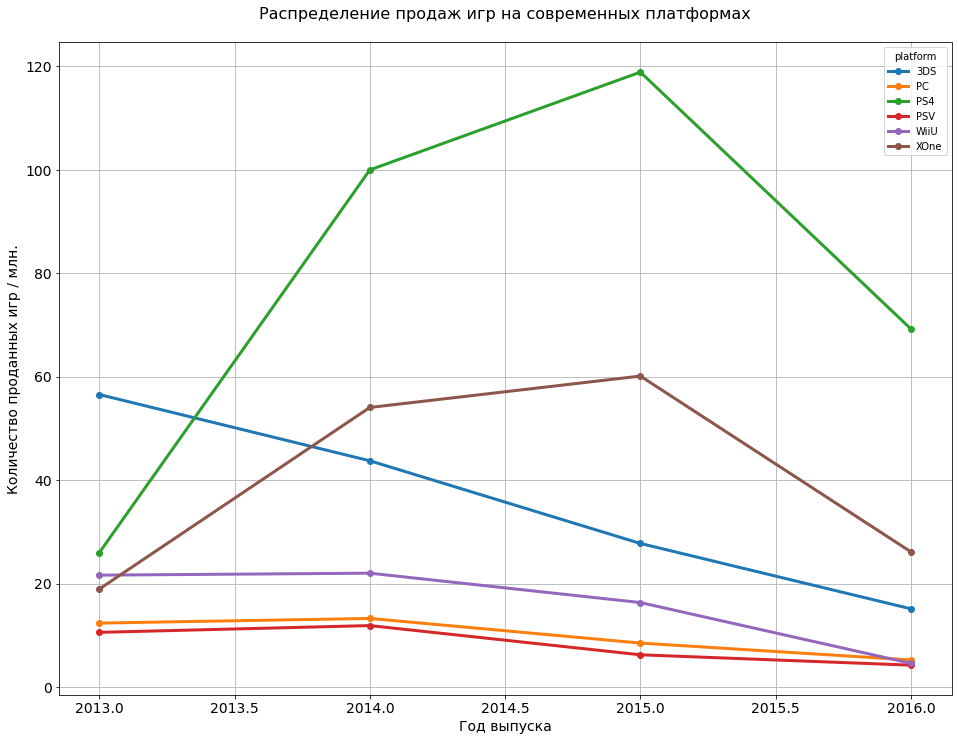

In [60]:
#продажи на актуальных платформах
(
    games.query('platform in @platform_modern and year_of_release >= 2013')
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .reset_index()
    .plot(
        x = 'year_of_release',
        figsize = (16,12),
        grid = True,
        fontsize = 14,
        linewidth = 3,
        style = 'o-'
    ).set_title('Распределение продаж игр на современных платформах' + "\n", fontsize = 16)  
)
plt.xlabel('Год выпуска', fontsize = 14)
plt.ylabel('Количество проданных игр / млн.', fontsize = 14);

Как и на графике с общими продажи по годам мы видим, что и для отдельно выбранных перспективных платформ виден спад с 2013 по 2016 год.  
Также видим очевидную тройку лидеров, несмотря на спад их продажи значительно выше остальных.  
Теперь посмотри какую долю от общего числа проданных игр для всех платформ составляют актуальные платформы за выбранный ранее период

In [61]:
#доля проданных игр приходящаяся на платформы нового поколения
(
    games.query('platform in @platform_modern and year_of_release >=2013')
    .groupby('platform')['sum_sales'].sum().sum()*100/games.query("year_of_release >=2013")
    .groupby('platform')['sum_sales'].sum().sum()
)

69.10854596631486

**С 2013 года по 2016 69.1% проданных игр пришлось на список акутальных платформ, выбранных ранее.  
Поэтому за акутальный период примем выбраный ранее интервал 2013-2016**

**Расчет жизненного цикла платформ**

In [76]:
# Комментарий ревьюера
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона,   
# поэтому +1
lifetime = time_life['life'].median()
print(f"Медианный жизненный цикл составляет: {lifetime}")

Медианный жизненный цикл составляет: 7.0


In [79]:
#маппинг жиненного цикла
mapper = dict(time_life[['platform', 'life']].values)
games['lifetime'] = games.platform.map(mapper)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,lifetime
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,11
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24,12
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,11
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,11
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38,14


In [67]:
#проверяем создание колонки с циклом жизни в датасете
games.query('platform not in @platform_modern')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,RP,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01


In [68]:
# проверяем
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


Построим boxplot для фильтрации и корректной оценки характерного времени жизни

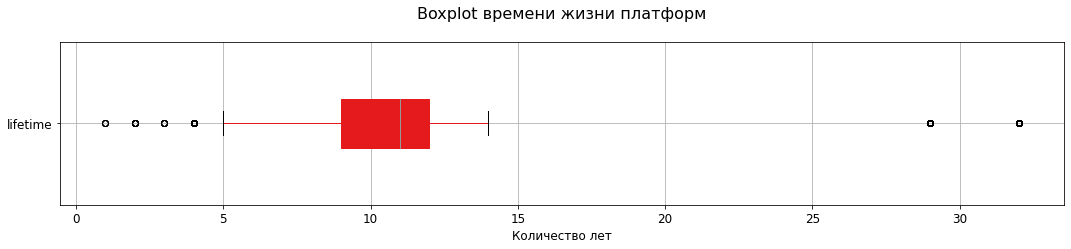

In [81]:
#boxplot
games['lifetime'].plot.box(
    figsize = (18,3), 
    fontsize = 12,
    vert = False,
    grid = True,
    colormap = 'Set1',
    widths = 0.3,
    patch_artist = True
    ).set_title('Boxplot времени жизни платформ' + "\n", fontsize = 16)
plt.xlabel('Количество лет', fontsize = 12);

Фильтруем выбросы 

In [82]:
#фильтрация по времени жизни
(
    games.query('5 < lifetime <= 13')
    .pivot_table(index='platform',values='lifetime',aggfunc = 'median')
    .sort_values(by='lifetime', ascending=False )
    .head(10)
)


,lifetime
platform,
PS2,12
X360,12
NES,12
PSP,12
PS3,11
DC,11
Wii,11
SNES,10
2600,10


In [83]:
#основные статистики
games.query('5 <= lifetime <= 13')['lifetime'].describe()

count    12819.000000
mean        10.133162
std          2.084569
min          5.000000
25%          9.000000
50%         11.000000
75%         12.000000
max         12.000000
Name: lifetime, dtype: float64

**Результаты**
- топ платформ по суммарным продажам составляют **PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC**
- к актуальным платформам отнесем следующие платформы **PC , XOne, PS4, WiiU, 3DS, PSV**
- актуальный период согласно полученным данным примем с 2013 года
- в среднем характерное время жизни платформы составляет около 9.6 лет, медиана - 10 лет

### Данные за актуальный период

Отфильтруем датасет согласно полученным данным

In [84]:
#фильтрация датасета
games_actual = games.loc[games['year_of_release'] >= 2013]

In [85]:
#games_actual
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,lifetime
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,11
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,12
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63,4
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60,6
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,4


In [86]:
#сбросим индексы
games_actual = games_actual.reset_index(drop = True)

In [87]:
#info
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  sum_sales        2233 non-null   float64
 12  lifetime         2233 non-null   int64  
dtypes: Int64(1), float64(7), int64(1), object(4)
memory usage: 229.1+ KB


В отфильтрованном датасете осталось всего 2233 записи. Посмотрим сколько пропусков осталось.

пропусков не осталось :) или произошла ошибка в первой части функции 


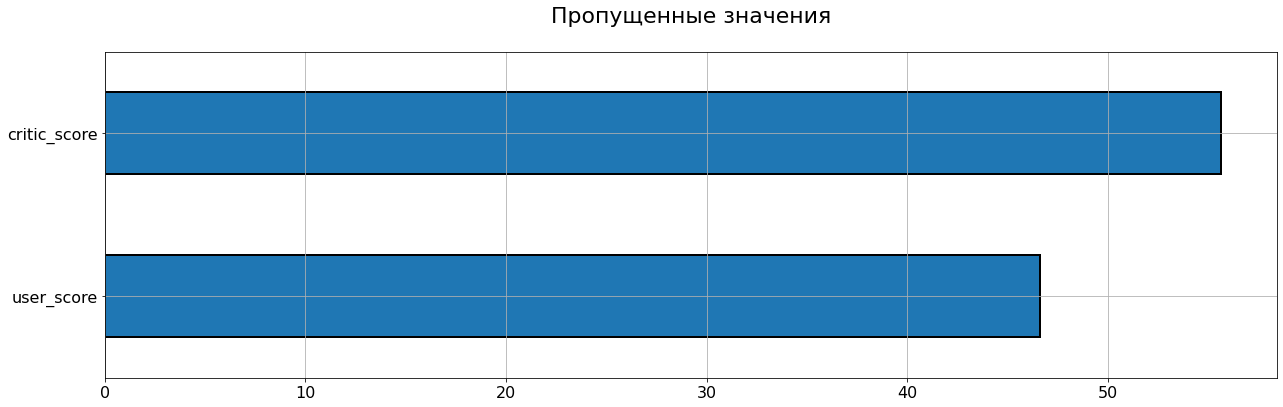

In [88]:
# процент пропусков
pass_value_barh(games_actual)

Остались пропуски в оценках критиков и пользователей, что в целом неудивительно.  
Процентное соотношение приблизительно такое же как и у исходного датафрейма.

Из списка ранее выбранных платформ с активными продажами выберем фокус-группу из самых прибыльных.

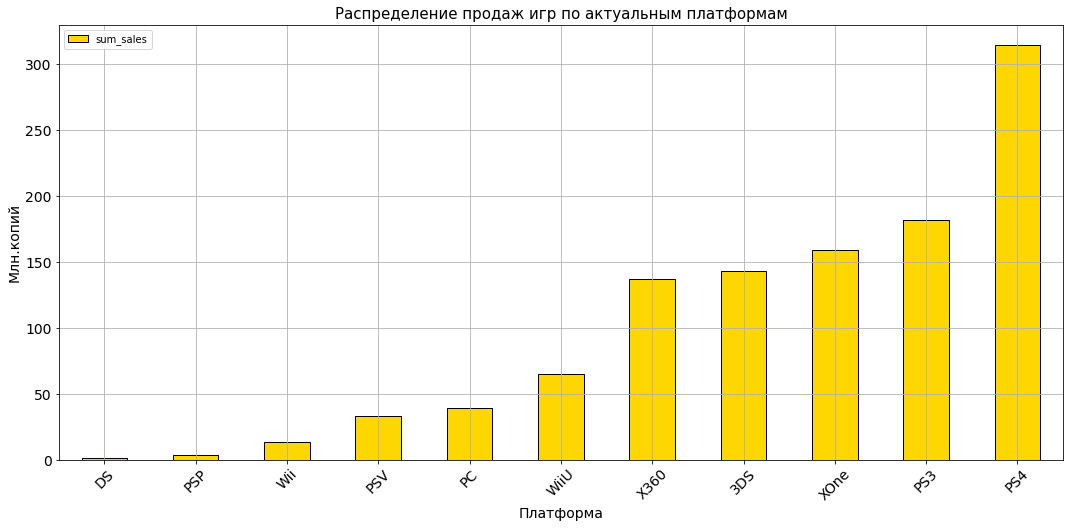

In [89]:
#изменение продаж по актуальным платформам
(
    games_actual.pivot_table(index = ['platform'], values = 'sum_sales', aggfunc = 'sum')
    .sort_values(by= 'sum_sales').plot(
        kind = 'bar',
        figsize = (18,8), 
        fontsize = 14,
        grid = True,
        edgecolor = 'black',
        rot = 45,
        color = 'gold'
    ).set_title('Распределение продаж игр по актуальным платформам', fontsize = 15)
)
plt.xlabel('Платформа', fontsize = 14)
plt.ylabel('Млн.копий', fontsize = 14);

За целевые платформы выбираем прибыльные платформы нового поколения, учитывая при этом разные форм-факторы(портативная и настольная), а также включим туда PC как наиболее стабильную и актуальную платформу в любое время

In [90]:
#целевые платформы
top_actual = ['PS4','WiiU','XOne', 'PC', '3DS']

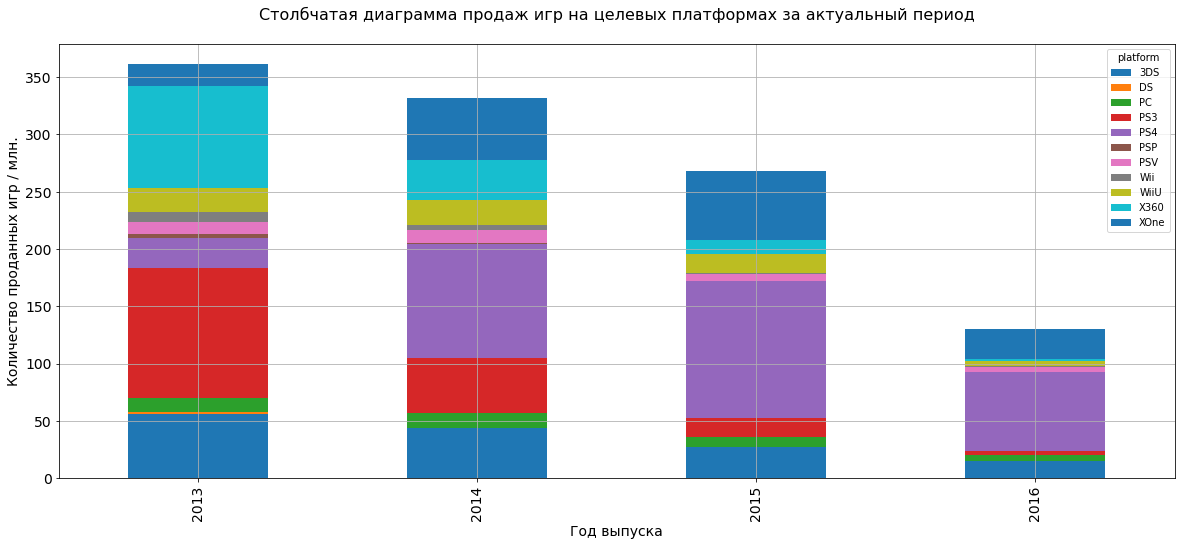

In [91]:
# распределение суммы проданных копий по годам на целевых платформах
(
    games_actual.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .reset_index()
    .plot(
        x = 'year_of_release',
        kind = 'bar',
        figsize = (20,8),
        stacked = True,
        grid = True,
        fontsize = 14
    ).set_title('Столбчатая диаграмма продаж игр на целевых платформах за актуальный период' + "\n", fontsize = 16)  
)
plt.xlabel('Год выпуска', fontsize = 14)
plt.ylabel('Количество проданных игр / млн.', fontsize = 14);


In [92]:
games_actual.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


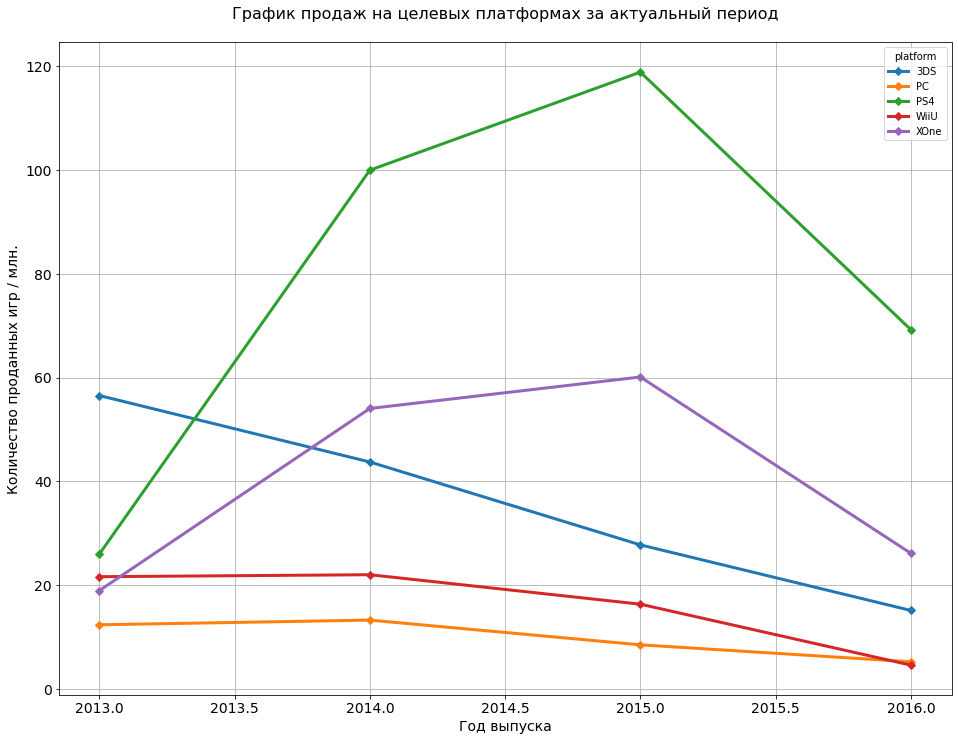

In [93]:
# распределение суммы проданных копий по годам на целевых платформах
(
    games_actual.query('platform in @top_actual')
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .reset_index()
    .plot(
        x = 'year_of_release',
        figsize = (16,12),
        grid = True,
        fontsize = 14,
        linewidth = 3,
        style = 'D-'
    ).set_title('График продаж на целевых платформах за актуальный период' + "\n", fontsize = 16)  
)
plt.xlabel('Год выпуска', fontsize = 14)
plt.ylabel('Количество проданных игр / млн.', fontsize = 14);


In [94]:
# характеристики для графика
games_actual.query('platform in @top_actual').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')

platform,3DS,PC,PS4,WiiU,XOne
year_of_release,,,,,
2013,56.57,12.38,25.99,21.65,18.96
2014,43.76,13.28,100.00,22.03,54.07
2015,27.78,8.52,118.90,16.35,60.14
2016,15.14,5.25,69.25,4.60,26.15


Из графиков мы видим, что продажи игр для новых консолей растут в то время как продажи на старых платформах падают.  
Однако с 2015 года мы видим общий спад по продажам

In [95]:
# сумма проданных копий по платформам
(
    games_actual.query('platform in @top_actual').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .sum()
    .sort_values(ascending = False)
)

platform
PS4     314.14
XOne    159.32
3DS     143.25
WiiU     64.63
PC       39.43
dtype: float64

### Boxplots

Построим ящики с усами для глобальных продаж в разбивке по платформам.  
Для того, чтобы уместить и корректно отобразить графики на листе отключим изображение выбросов за пределыами IQR

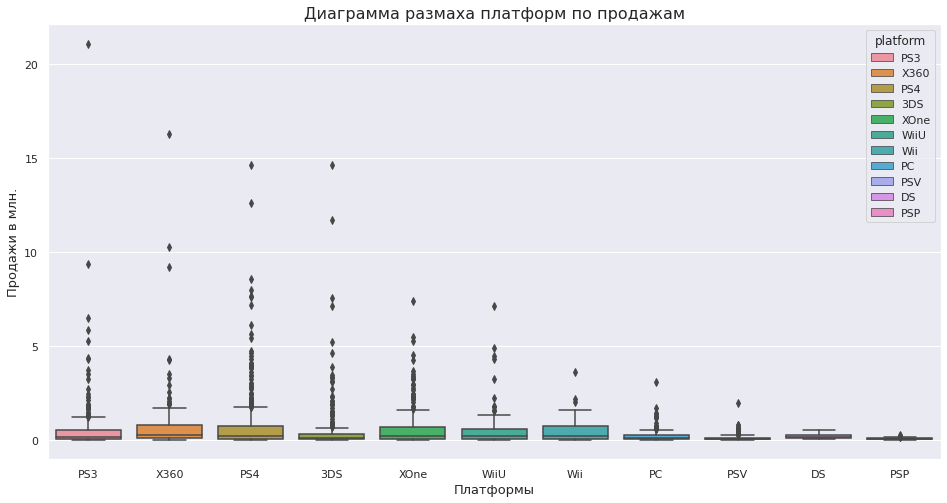

In [96]:
#full view 
sns.set(rc={"figure.figsize":(16, 8)})
sns.boxplot(
    x = 'platform', 
    y = 'sum_sales', 
    data = games_actual.sort_values('sum_sales', ascending = False),
    showfliers = True,
    hue = 'platform',
    dodge = False
).set_title('Диаграмма размаха платформ по продажам', fontsize = 16)
plt.xlabel('Платформы', fontsize = 13)
plt.ylabel('Продажи в млн.', fontsize = 13);

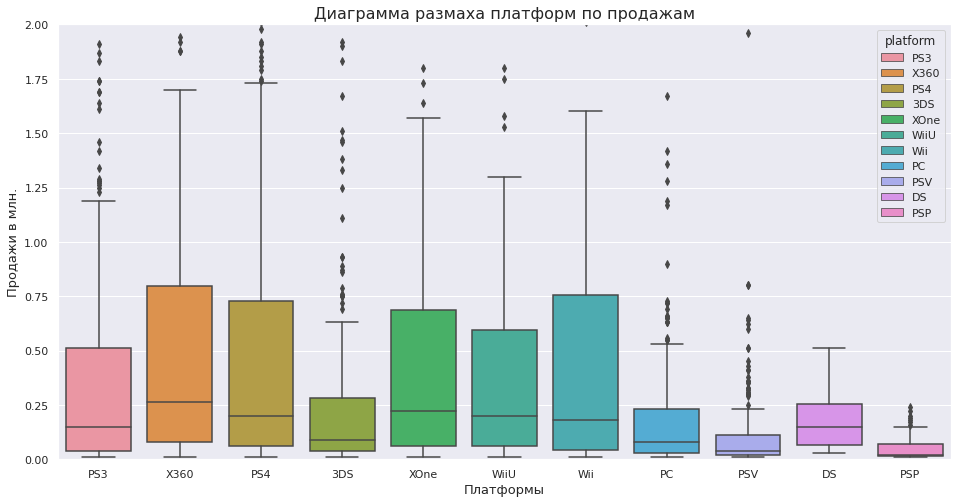

In [97]:
#limited view
sns.set(rc={"figure.figsize":(16, 8)})
sns.boxplot(
    x = 'platform', 
    y = 'sum_sales', 
    data = games_actual.sort_values('sum_sales', ascending = False),
    showfliers = True,
    hue = 'platform',
    dodge = False
).set_title('Диаграмма размаха платформ по продажам', fontsize = 16)
plt.ylim(0,2)
plt.xlabel('Платформы', fontsize = 13)
plt.ylabel('Продажи в млн.', fontsize = 13);

In [98]:
#числовые пояснения к графику
(
    games_actual
    .query('platform in @top_actual')
    .sort_values('sum_sales',ascending = True)
    .groupby('platform')['sum_sales']
    .describe()
)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
PC,189.0,0.208624,0.352304,0.01,0.03,0.08,0.230,3.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
WiiU,115.0,0.562000,1.038778,0.01,0.06,0.20,0.595,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


**Выводы**
- у PS4 самые длинные "усы", что говорит о частых всплесках т.е. о больших пиках в суммах проданных копий(см. столбец max), у 3DS тоже высокий пик - 14.63 и 14.6 соотвественно. Это говорит о том, что на этих консолях вероятнее всего выходили громкие хиты
- медианное значений продаж приблизительно равно у PS4, XOne и WiiU
- количество элементов в выборке неоднородно, встречаются различия в 2-3 раза у межквартильных размахов


### Корелляция и диаграмма рассеяния

Изучим влияние отзывов критиков и игроков на продажи внутри одной популярной платформы.  
Выберем PS4 и построим диаграммы рассеяния

#### PS4

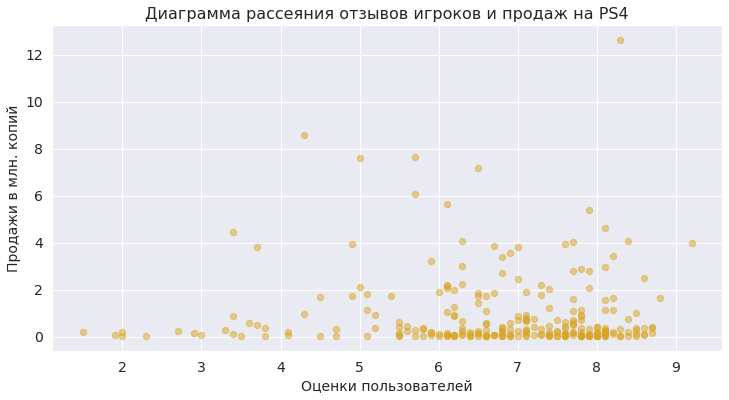

In [99]:
#оценки пользователей
(
    games_actual[games_actual['platform'] == 'PS4']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='user_score', 
        alpha=0.5,
        figsize=(12,6),
        fontsize = 14,
        c = 'goldenrod', 
        s = 40)
)
plt.title('Диаграмма рассеяния отзывов игроков и продаж на PS4', fontsize = 16)
plt.xlabel('Оценки пользователей', fontsize = 14)
plt.ylabel('Продажи в млн. копий', fontsize = 14);

In [100]:
#оценки критиков
    games_actual[games_actual['platform'] == 'PS4']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='critic_score', 
        alpha=0.5,
        figsize=(12,6),
        fontsize = 14,
        c = 'magenta', 
        s = 40)
)
plt.title('Диаграмма рассеяния отзывов критиков и продаж на PS4', fontsize = 16)
plt.xlabel('Оценки пользователей', fontsize = 14)
plt.ylabel('Продажи в млн. копий', fontsize = 14);

IndentationError: unexpected indent (2902884182.py, line 2)

Построим матрицу коррелляции PS4

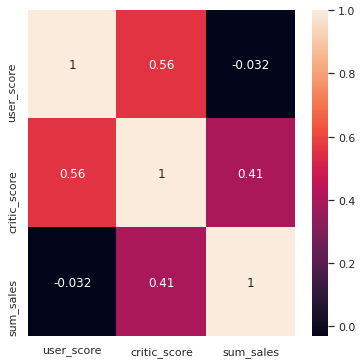

In [101]:
#коэффициенты коррелляции fixed
corr_scores = games_actual.query('platform == "PS4"')[['user_score','critic_score','sum_sales']].corr()
sns.set(rc={"figure.figsize":(6, 6)})
sns.heatmap(
    corr_scores, 
    annot=True);

- между оценками критиков и пользователей наблюдается умеренная корреляция с коэффициентом 0.56
- между оценками критиков и суммарными продажами наблюдается умеренная корреляция - коэффициент 0.41
- между оценками пользователей и суммарными продажами корреляция отсутствует - коэффициент принимает значение около нуля

#### 3DS

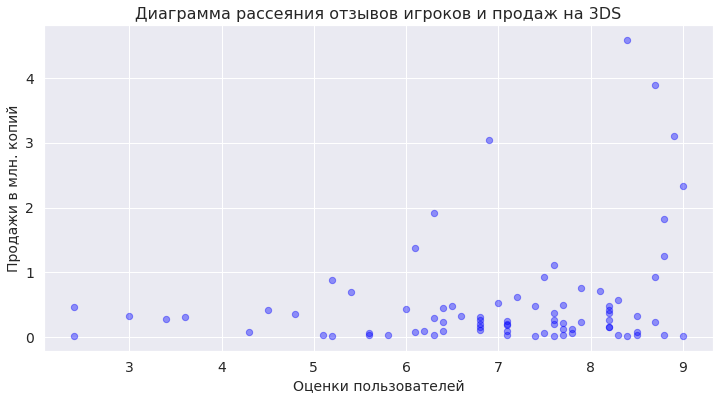

In [102]:
#оценки пользователей fixed
(
    games_actual[games_actual['platform'] == '3DS']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='user_score',
        alpha=0.4,
        figsize=(12,6),
        fontsize = 14,
        c = 'blue', 
        s = 40)
)
plt.title('Диаграмма рассеяния отзывов игроков и продаж на 3DS', fontsize = 16)
plt.xlabel('Оценки пользователей', fontsize = 14)
plt.ylabel('Продажи в млн. копий', fontsize = 14);

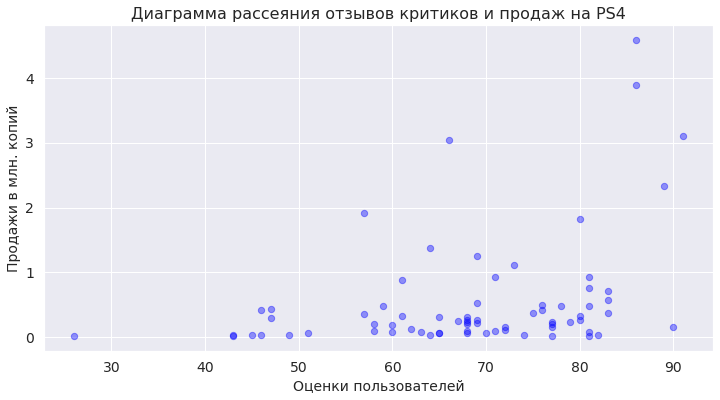

In [103]:
#оценки критиков 
(
    games_actual[games_actual['platform'] == '3DS']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='critic_score', 
        alpha=0.4,
        figsize=(12,6),
        fontsize = 14,
        c = 'blue', 
        s = 40)
)
plt.title('Диаграмма рассеяния отзывов критиков и продаж на PS4', fontsize = 16)
plt.xlabel('Оценки пользователей', fontsize = 14)
plt.ylabel('Продажи в млн. копий', fontsize = 14);

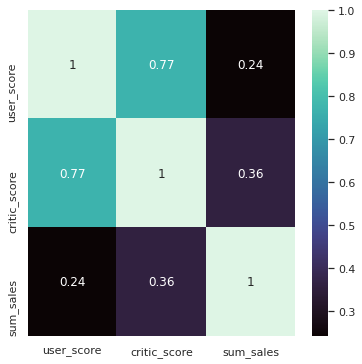

In [104]:
#коэффициенты коррелляции
corr_scores = games_actual.query('platform == "3DS"')[['user_score','critic_score','sum_sales']].corr()
sns.set(rc={"figure.figsize":(6, 6)})
sns.heatmap(
    corr_scores, 
    annot=True,
    cmap = 'mako'
);

- между оценками критиков и пользователей наблюдается выраженная корреляция с коэффициентом 0.77
- между оценками критиков и суммарными продажами наблюдается слабая корреляция - коэффициент 0.36
- между оценками пользователей и суммарными продажами корреляция существует слабая корелляцмя - коэффициент 0.24

#### XOne

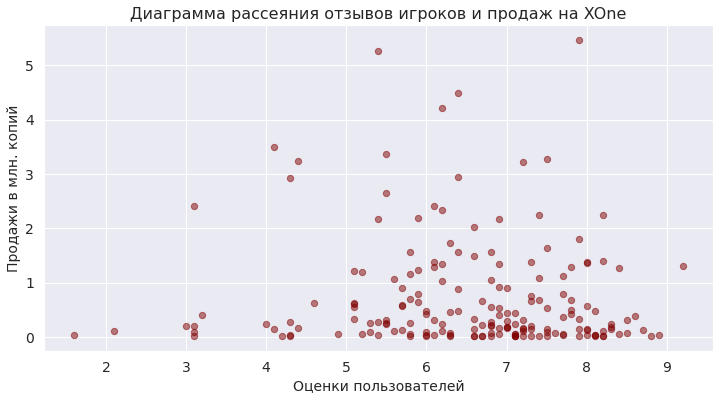

In [105]:
#оценки пользователей
(
    games_actual[games_actual['platform'] == 'XOne']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='user_score', 
        alpha=0.5,
        figsize=(12,6),
        fontsize = 14,
        c = 'maroon', 
        s = 40)
)
plt.title('Диаграмма рассеяния отзывов игроков и продаж на XOne', fontsize = 16)
plt.xlabel('Оценки пользователей', fontsize = 14)
plt.ylabel('Продажи в млн. копий', fontsize = 14);

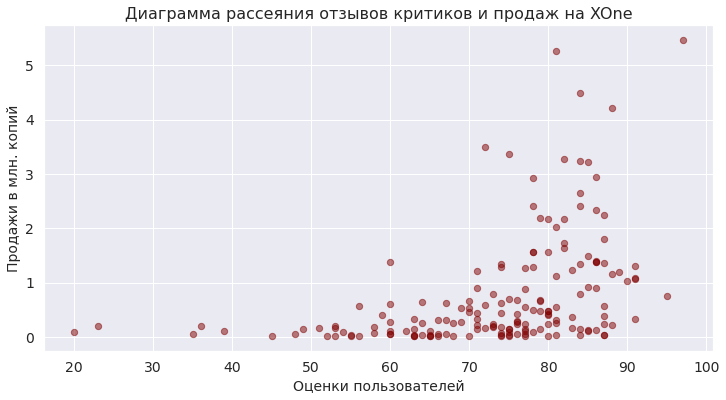

In [106]:
# #оценки критиков
(
    games_actual[games_actual['platform'] == 'XOne']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='critic_score', 
        alpha=0.5,
        figsize=(12,6),
        fontsize = 14,
        c = 'maroon', 
        s = 40)
)
plt.title('Диаграмма рассеяния отзывов критиков и продаж на XOne', fontsize = 16)
plt.xlabel('Оценки пользователей', fontsize = 14)
plt.ylabel('Продажи в млн. копий', fontsize = 14);

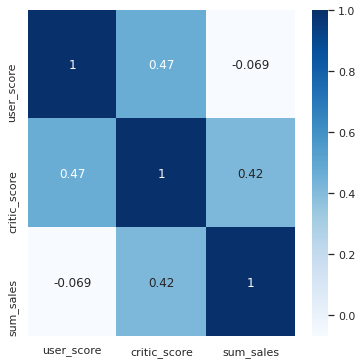

In [107]:
#коэффициенты коррелляции 
corr_scores = games_actual.query('platform == "XOne"')[['user_score','critic_score','sum_sales']].corr()
sns.set(rc={"figure.figsize":(6, 6)})
sns.heatmap(
    corr_scores, 
    annot=True,
    cmap = 'Blues'
);

- между оценками критиков и пользователей наблюдается умеренная корреляция с коэффициентом 0.47
- между оценками критиков и суммарными продажами наблюдается умеренная корреляция - коэффициент 0.42
- между оценками пользователей и суммарными продажами корреляция отсутствует - коэффициент принимает значение около нуля

#### PC

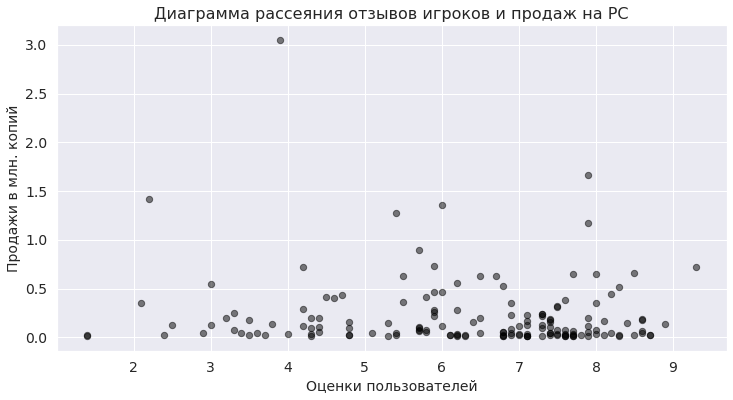

In [108]:
# #оценки пользователей
(
    games_actual[games_actual['platform'] == 'PC']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='user_score', 
        alpha=0.5,
        figsize=(12,6),
        fontsize = 14,
        c = 'black', 
        s = 40)
)
plt.title('Диаграмма рассеяния отзывов игроков и продаж на PC', fontsize = 16)
plt.xlabel('Оценки пользователей', fontsize = 14)
plt.ylabel('Продажи в млн. копий', fontsize = 14);

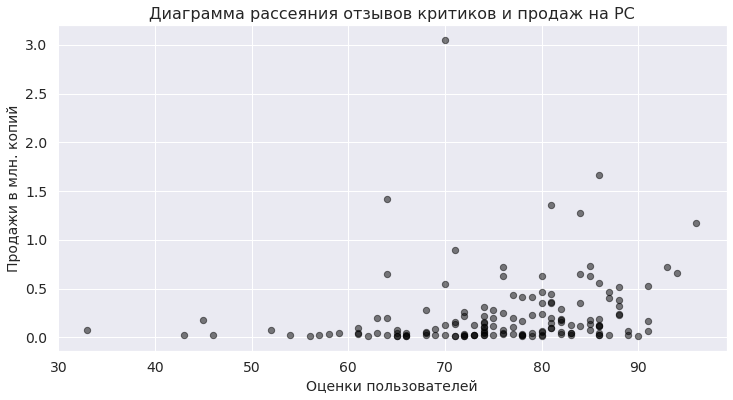

In [109]:
#оценки критиков
(
    games_actual[games_actual['platform'] == 'PC']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='critic_score', 
        alpha=0.5,
        figsize=(12,6),
        fontsize = 14,
        c = 'black', 
        s = 40)
)
plt.title('Диаграмма рассеяния отзывов критиков и продаж на PC', fontsize = 16)
plt.xlabel('Оценки пользователей', fontsize = 14)
plt.ylabel('Продажи в млн. копий', fontsize = 14);

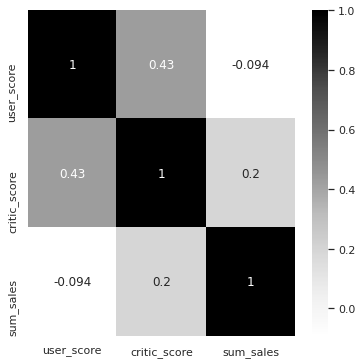

In [110]:
#коэффициенты коррелляции
corr_scores = games_actual.query('platform == "PC"')[['user_score','critic_score','sum_sales']].corr()
sns.set(rc={"figure.figsize":(6, 6)})
sns.heatmap(
    corr_scores, 
    annot=True,
    cmap = 'Greys'
);

- между оценками критиков и пользователей наблюдается умеренная корреляция с коэффициентом 0.43
- между оценками критиков и суммарными продажами наблюдается слабая корреляция - коэффициент 0.2
- между оценками пользователей и суммарными продажами корреляция отсутствует - коэффициент принимает значение около нуля

#### WiiU

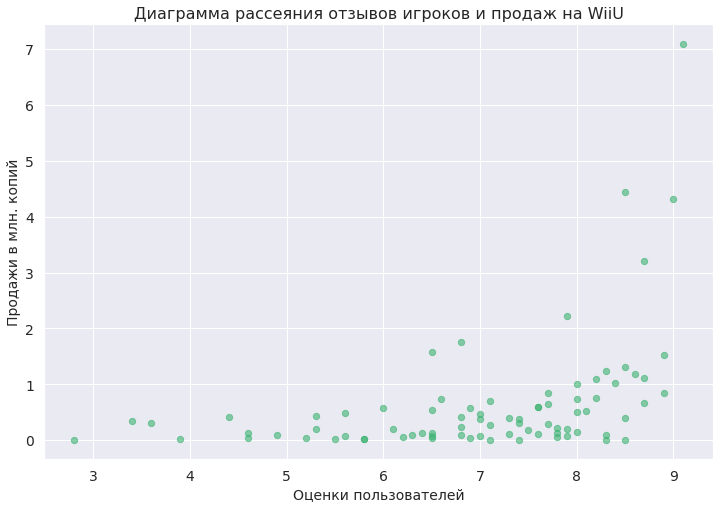

In [111]:
#оценки пользователей
(    games_actual[games_actual['platform'] == 'WiiU']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='user_score', 
        alpha=0.6,
        figsize=(12,8),
        fontsize = 14,
        c = 'mediumseagreen', 
        s = 40)
)
plt.title('Диаграмма рассеяния отзывов игроков и продаж на WiiU', fontsize = 16)
plt.xlabel('Оценки пользователей', fontsize = 14)
plt.ylabel('Продажи в млн. копий', fontsize = 14);

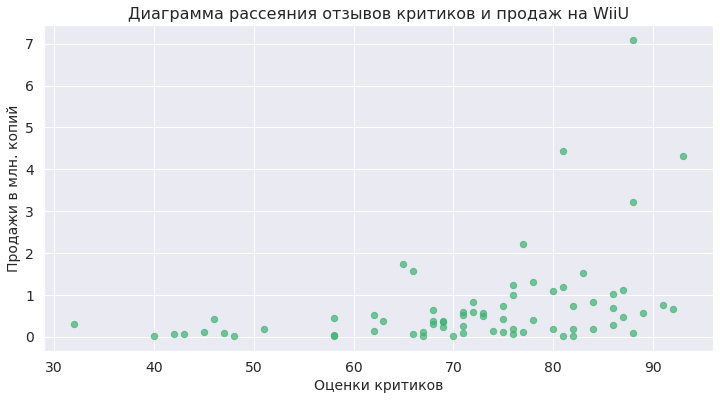

In [112]:
# #оценки критиков
(
    games_actual[games_actual['platform'] == 'WiiU']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='critic_score', 
        alpha=0.7,
        figsize=(12,6),
        fontsize = 14,
        c = 'mediumseagreen', 
        s = 40)
)
plt.title('Диаграмма рассеяния отзывов критиков и продаж на WiiU', fontsize = 16)
plt.xlabel('Оценки критиков', fontsize = 14)
plt.ylabel('Продажи в млн. копий', fontsize = 14);

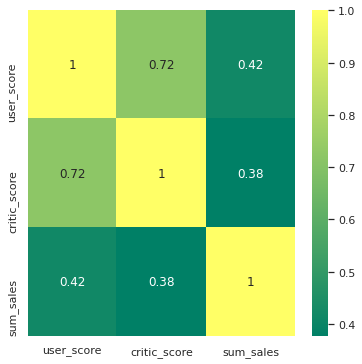

In [113]:
#коэффициенты коррелляции
corr_scores = games_actual.query('platform == "WiiU"')[['user_score','critic_score','sum_sales']].corr()
sns.set(rc={"figure.figsize":(6, 6)})
sns.heatmap(
    corr_scores, 
    annot=True,
    cmap = 'summer'
);

- на этой платформе между оценками критиков и пользователей наблюдается сильная корреляция с коэффициентом 0.72, это самое высокое значение среди выбранных платформ
- между оценками критиков и суммарными продажами наблюдается умеренная корреляция - коэффициент 0.38
- между оценками пользователей и суммарными продажами корреляция умеренная  - коэффициент 0.42, это также самое высокое значение среди прочих платформ

#### PS3

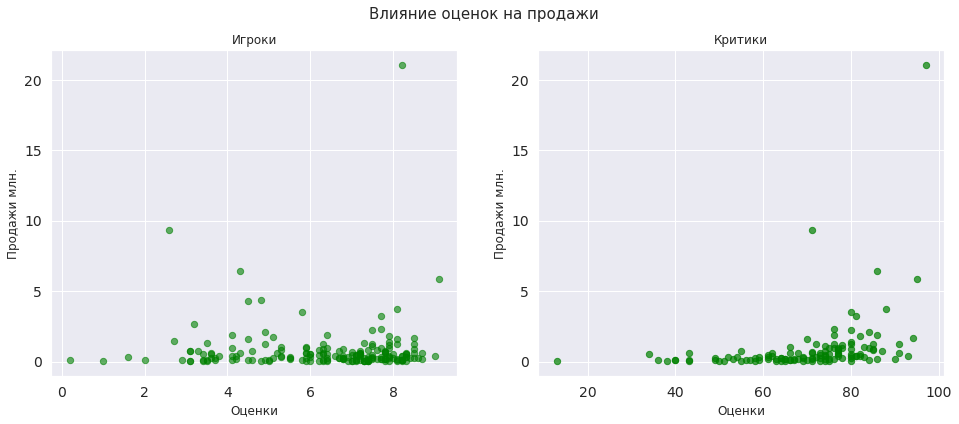

In [114]:
#создаем канву
fig,axes = plt.subplots(1,2)
fig.suptitle('Влияние оценок на продажи', fontsize = 15)
(
    games_actual[games_actual['platform'] == 'PS3']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='user_score',
        ylabel = 'Продажи млн.',
        xlabel = 'Оценки',
        alpha=0.6,
        figsize=(16,6),
        fontsize = 14,
        c = 'green',
        ax = axes[0],
        s = 40).set_title('Игроки', fontsize = 12)
)


(
    games_actual[games_actual['platform'] == 'PS3']
    .plot(
        kind='scatter',
        y='sum_sales' , 
        x='critic_score', 
        alpha=0.7,
        ylabel = 'Продажи млн.',
        xlabel = 'Оценки',
        #figsize=(12,6),
        fontsize = 14,
        c = 'green',
        ax = axes[1],
        s = 40).set_title('Критики', fontsize = 12)
);

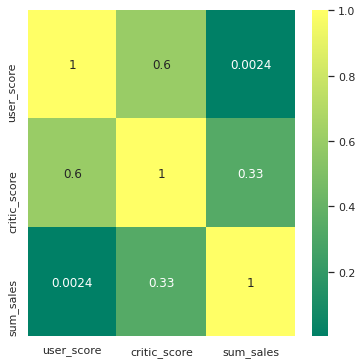

In [115]:
#коэффициенты коррелляции fixed
corr_scores = games_actual.query('platform == "PS3"')[['user_score','critic_score','sum_sales']].corr()
sns.set(rc={"figure.figsize":(6, 6)})
sns.heatmap(
    corr_scores, 
    annot=True,
    cmap = 'summer'
);

#### Выводы

- пользователи и критики в основном единогласны в своих мнениях, среди всех платформ корелляция между их оценками умеренно-высокая
- чаще на продажи влиют оценки критиков, здесь наблюдается умеренная корелляция с числом проданных копий
- оценки пользователей практически никак не влияют на продажи, скорее всего это связано с тем, что первыми появляются отзывы от критиков и только потом от самих игроков
- у Wii картина немного отличается, там на продажи умеренно влияют и оценки пользователей и оценки критиков


*Шкала Чеддока для оценки степени корреляции*
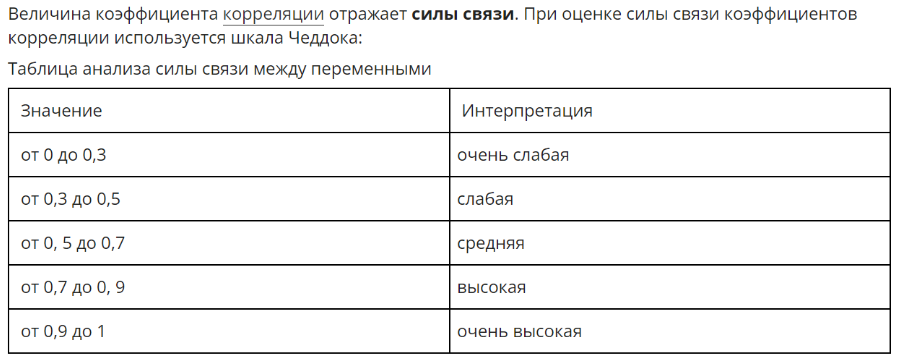

### Распределение игр по жанрам

Построим распределение игр по жанрам и выясним какие из них более прибыльные

In [117]:
#числовые значения
(
    games_actual
    .pivot_table(index = 'genre', columns = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
)

year_of_release,2013,2014,2015,2016
genre,,,,
Action,122.51,97.23,72.02,30.11
Adventure,6.09,5.57,8.16,3.82
Fighting,7.09,15.85,7.90,4.47
Misc,25.27,23.38,11.57,2.60
Platform,24.54,8.81,6.05,3.23
Puzzle,0.96,1.49,0.71,0.01
Racing,12.37,16.66,8.07,2.79
Role-Playing,44.45,45.62,37.64,18.18
Shooter,62.04,65.21,67.51,38.22


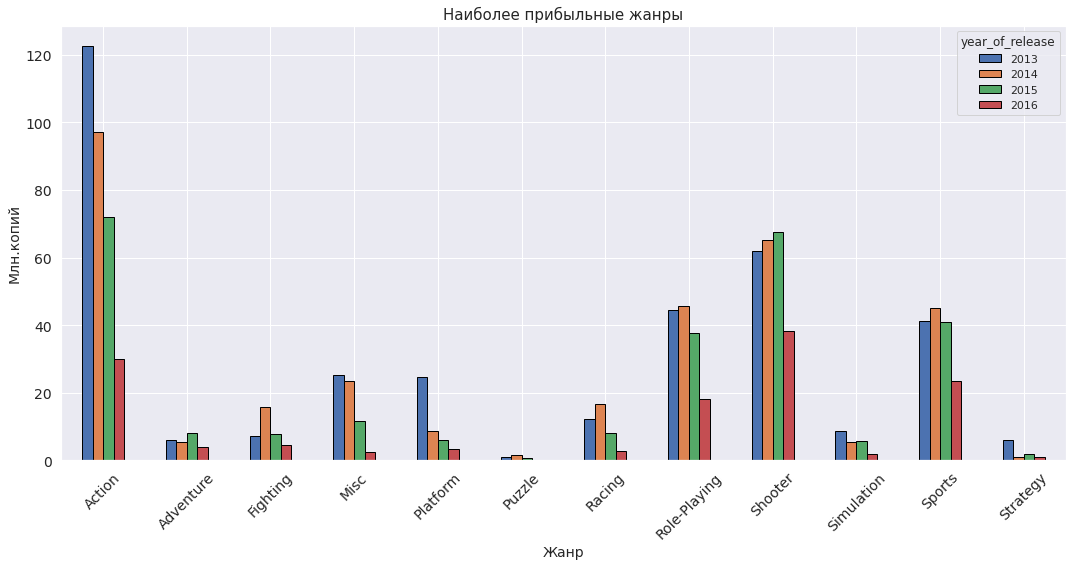

In [118]:
#столбчатая диаграмма самых прибыльных жанров по годам
(
    games_actual
    .pivot_table(index = 'genre', columns = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .plot(
        kind = 'bar',
        figsize = (18,8), 
        fontsize = 14,
        rot = 45,
        edgecolor = 'black'
    ).set_title('Наиболее прибыльные жанры', fontsize = 15)
)
plt.xlabel('Жанр', fontsize = 14)
plt.ylabel('Млн.копий', fontsize = 14);
        

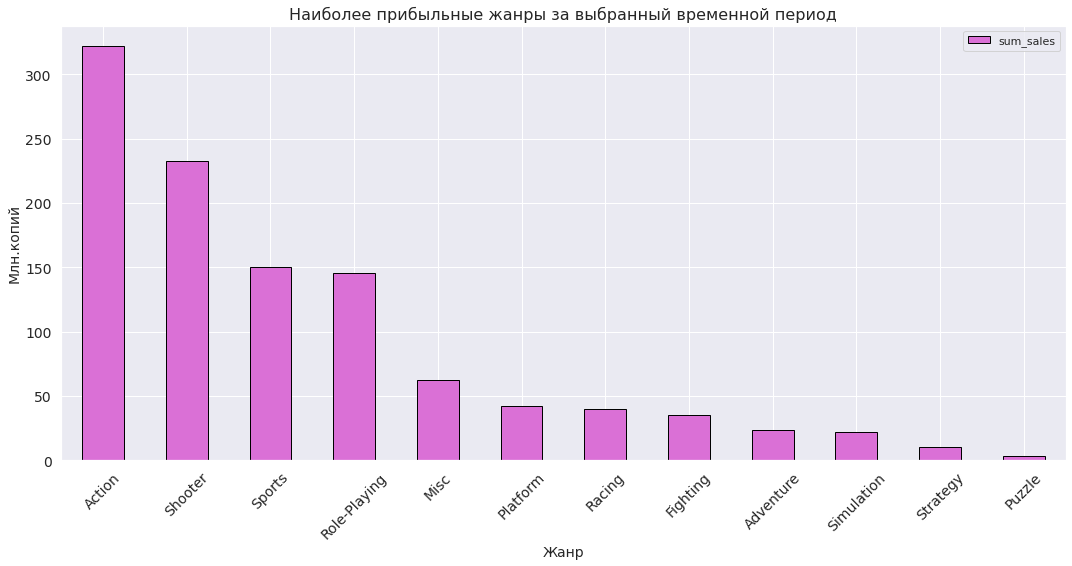

In [119]:
#суммарные продажи по жанрам за выбранный временной период
(
    games_actual
    .pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('sum_sales',ascending = False)
    .plot(
        kind = 'bar',
        figsize = (18,8), 
        fontsize = 14,
        rot = 45,
        color = 'orchid',
        edgecolor = 'black'
    ).set_title('Наиболее прибыльные жанры за выбранный временной период', fontsize = 16)
)
plt.xlabel('Жанр', fontsize = 14)
plt.ylabel('Млн.копий', fontsize = 14);
        

#### Медианные продажи

In [120]:
#числовые значения отсортированные по возрастанию
(
    games_actual
    .pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median')
    .sort_values('sum_sales',ascending = False)
    .reset_index()
)

,genre,sum_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


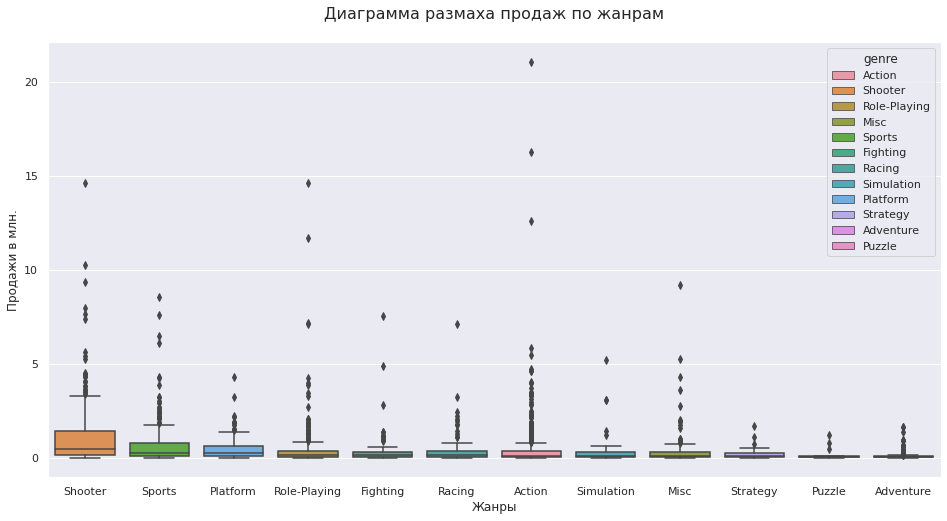

In [121]:
#full view 
grouped = games_actual.groupby('genre').median().sort_values('sum_sales', ascending = False)
sns.set(rc={"figure.figsize":(16, 8)})
sns.boxplot(
    x = 'genre', 
    y = 'sum_sales', 
    data = games_actual,
    order = grouped.index,
    showfliers = True,
    hue = 'genre',
    dodge = False,
    saturation = .7
).set_title('Диаграмма размаха продаж по жанрам'+ '\n', fontsize = 16)

plt.xlabel('Жанры', fontsize = 12)
plt.ylabel('Продажи в млн.', fontsize = 12);

**Комментарий**
- у шутеров, RPG и экшнов самые большие всплески, судя по всему в этих жанрах выходили громкие хиты, однако медианные значения у PRG и экшн не такие высокие как у шутеров

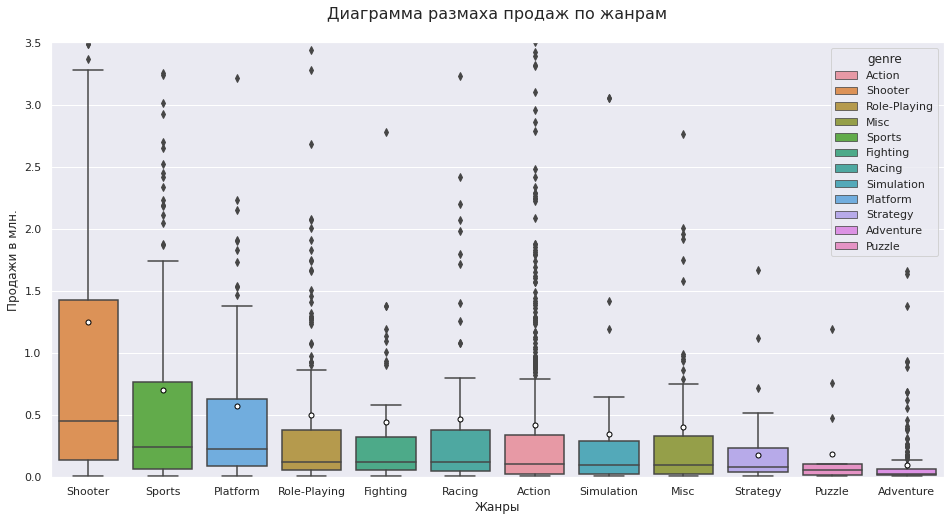

In [122]:
#lim view
grouped = games_actual.groupby('genre').median().sort_values('sum_sales', ascending = False)
sns.set(rc={"figure.figsize":(16, 8)})
sns.boxplot(
    x = 'genre', 
    y = 'sum_sales', 
    data = games_actual,
    order = grouped.index,
    showfliers = True,
    hue = 'genre',
    dodge = False,
    saturation = .7,
    showmeans = True,
    meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"}
).set_title('Диаграмма размаха продаж по жанрам'+ '\n', fontsize = 16)
plt.ylim(0,3.5)
plt.xlabel('Жанры', fontsize = 12)
plt.ylabel('Продажи в млн.', fontsize = 12);

#### Выводы

- из диаграмм размаха мы видим, что по медианным значениям в топе продаж оказались шутеры, спортивные симуляторы и платформер, на четвертом месте расположились RPG, на пятом файтинги
- по сравнению с первоначальным вариаантом видно, что более стабильно продающимися является другая пятерка жанров
-  файтинги, гонки, экшн,RPG, симуляторы и misc имеют приблизительно одинаковые медианные значения и размах, т.е. пользуются примерно одинаковым спросом

## Портрет пользователя

Рассмотрим популярные жанры и платформы у пользователей из разных регионов продаж в период с 2013 по 2016

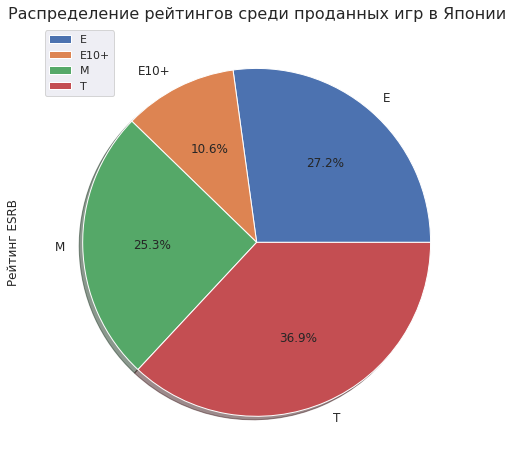

In [123]:
#распределение рейтингов
games_actual.query('rating != "RP"').groupby('rating')['jp_sales'].sum().plot(
    kind = 'pie',
    legend = True,
    fontsize = 12,
    figsize = (8,8),
    autopct='%1.1f%%',
    shadow = True
).set_title('Распределение рейтингов среди проданных игр в Японии', fontsize = 16)
plt.ylabel('Рейтинг ESRB'+"\n", fontsize = 12);

**Выводы**
- в Японии лидирующими жанрами являются RPG и экшн, на третьем месте "misc"
- популярными платформами являются 3DS, PS3, PSV, а также PS4 и Wii U
- практически 75% занимают игры для всех, подростков и детей старше 10 лет, остальное занимают игры для взрослых

### ТОП-5 платформ по регионам

In [124]:
#### добавляем группу "другие" для Северной Америки

platform_5_na = (
    games_actual
    .pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
    .reset_index()
)
platform_5_na['platform'].where(platform_5_na['na_sales']>platform_5_na.iloc[5,1],'Others', inplace = True)

In [125]:
#### добавляем группу "другие" для Европы

platform_5_eu= (
    games_actual
    .pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
    .reset_index()
)
platform_5_eu['platform'].where(platform_5_eu['eu_sales']>platform_5_eu.iloc[5,1],'Others', inplace = True)

In [126]:
#### добавляем группу "другие" для Японии

platform_5_jp= (
    games_actual
    .pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
    .reset_index()
)
platform_5_jp['platform'].where(platform_5_jp['jp_sales']>platform_5_jp.iloc[5,1],'Others', inplace = True)

In [127]:
platform_5_na.groupby('platform')['na_sales'].sum()

platform
3DS        38.20
Others     52.49
PS3        63.50
PS4       108.74
X360       81.66
XOne       93.12
Name: na_sales, dtype: float64

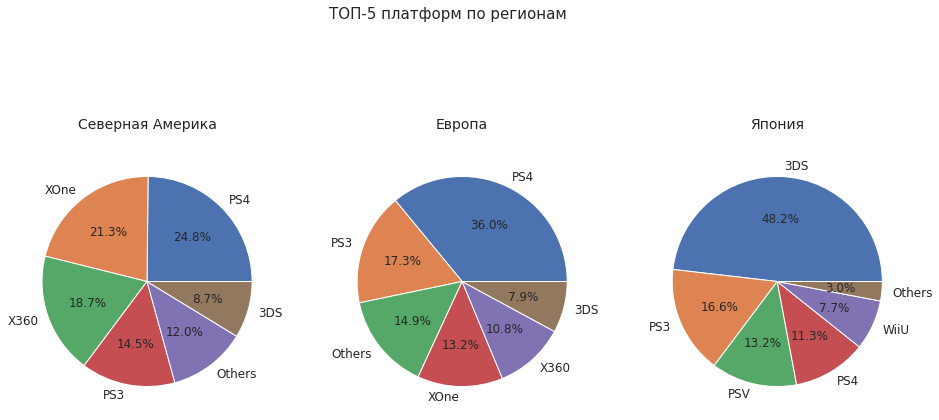

In [128]:
#создаем канву
fig,axes = plt.subplots(1,3)
fig.suptitle('ТОП-5 платформ по регионам', fontsize = 15)
#top5 in NA
platform_5_na.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(6).plot(    
        fontsize = 12,
        kind = 'pie',
        ylabel = '',
        grid = True,
        autopct='%1.1f%%',
        ax = axes[0],    
    ).set_title('Северная Америка' + "\n", fontsize = 14)
#top5 in Europe
platform_5_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(6).plot(     
        fontsize = 12,
        kind = 'pie',
        grid = True,
        ylabel = '',
        autopct='%1.1f%%',
        ax = axes[1]
    ).set_title('Европа' + "\n", fontsize = 14)
#top 5 in Japan
platform_5_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(6).plot(  
        fontsize = 12,
        kind = 'pie',
        ylabel = '',
        grid = True,
        autopct='%1.1f%%',
        ax = axes[2]
    ).set_title('Япония' + "\n", fontsize = 14);

### ТОП-5 жанров по регионам

In [129]:
#### добавляем группу "другие" для Северной Америки

gen5_na = (
    games_actual
    .pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
    .reset_index()
)
gen5_na['genre'].where(gen5_na['na_sales']>gen5_na.iloc[5,1],'Others', inplace = True)

In [130]:
#### добавляем группу "другие" для Европы

gen5_eu = (
    games_actual
    .pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
    .reset_index()
)
gen5_eu['genre'].where(gen5_eu['eu_sales']>gen5_eu.iloc[5,1],'Others', inplace = True)

In [131]:
#### добавляем группу "другие" для Японии

gen5_jp = (
    games_actual
    .pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
    .reset_index()
)
gen5_jp['genre'].where(gen5_jp['jp_sales']>gen5_jp.iloc[5,1],'Others', inplace = True)

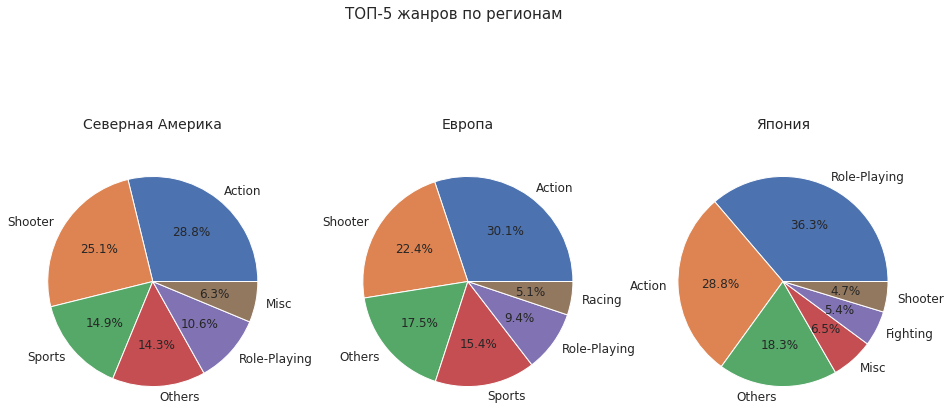

In [132]:
#создаем канву
fig,axes = plt.subplots(1,3)
fig.suptitle('ТОП-5 жанров по регионам', fontsize = 15)
#top5 in NA
gen5_na.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(6).plot(    
        fontsize = 12,
        ylabel = '',
        kind = 'pie',
        grid = True,
        autopct='%1.1f%%',
        ax = axes[0]
    ).set_title('Северная Америка' + "\n", fontsize = 14)
#top5 in Europe    
gen5_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(6).plot(     
        fontsize = 12,
        kind = 'pie',
        ylabel = '',
        grid = True,
        autopct='%1.1f%%',
        ax = axes[1]
    ).set_title('Европа' + "\n", fontsize = 14)
#top 5 in Japan
gen5_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(6).plot(  
        fontsize = 12,
        kind = 'pie',
        ylabel = '',
        grid = True,
        autopct='%1.1f%%',
        ax = axes[2]
    ).set_title('Япония' + "\n", fontsize = 14);

### ТОП-5 рейтингов по регионам

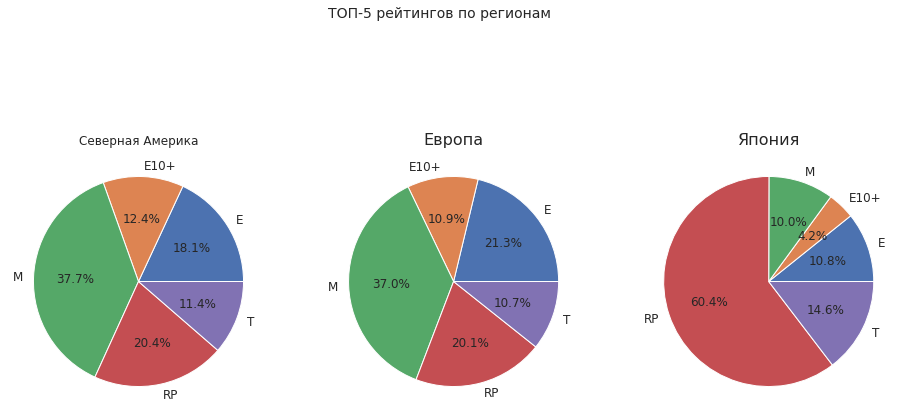

In [133]:
#создаем канву
fig,axes = plt.subplots(1,3)
fig.suptitle('ТОП-5 рейтингов по регионам', fontsize = 14)

#распределение рейтингов в Северной Америке
games_actual.groupby('rating')['na_sales'].sum().plot(
    kind = 'pie',
    ylabel = '',
    fontsize = 12,
    ax = axes[0],
    autopct='%1.1f%%',
).set_title('Северная Америка', fontsize = 12)

#распределение рейтингов в Европе
games_actual.groupby('rating')['eu_sales'].sum().plot(
    kind = 'pie',
    ylabel = '',
    fontsize = 12,
    ax = axes[1],
    autopct='%1.1f%%'
).set_title('Европа', fontsize = 16)
#распределение рейтингов в Японии
games_actual.groupby('rating')['jp_sales'].sum().plot(
    kind = 'pie',
    ylabel = '',
    fontsize = 12,
    ax = axes[2],
    autopct='%1.1f%%',
).set_title('Япония', fontsize = 16);

### Выводы

- в Северной Америке любимые платформы - PS4 и XOne, любимые жанры - экщн, шутер и спортивные симуляторы
- в Европе практически идентичная качественная картина, только на первых местах платформы Sony(PS4 и PS3)
- распределение рейтингов в Европе и Северной Америке качественно практически неотличимы - преобладают рейтинги М, T
- в Японии качественно другая картина, там лидируют платформы 3DS, PSV, т.е. портативные платформы, игры в основном имеют детский рейтинг или рейтинг для всех, а любимые жанры это RPG и экшн, также в топ попали файтинги и misc


## Проверка гипотез

Проверим несколько статистических гипотез согласно задания.  
Сформулируем нулевую и альтернативные гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза $ \normalsize H \scriptsize 0 $ :  
___
*Среднее генеральной совокупности пользовательских рейтингов платформы XBox One совпадает со средним значением на PC*

Альтернативная гипотеза:$ \normalsize H \scriptsize 1 $ :  
___
*Среднее генеральной совокупности пользовательских рейтингов платформы XBox One не равно среднему генеральной совокупности рейтингов на PC*

Первый набор гипотез сформулирован на основе задания: нужно убедиться в равенстве средних значений двух совокупностей рейтингов на разных платформах или опровергнуть их равенство, т.е. показать, что они статистически значимо различаются

Сформируем выборки для проверки гипотезы.

In [134]:
#создаем выборки
xbox_scores = games_actual.query('platform == "XOne"').loc[games_actual['user_score'].isna() == False]['user_score']
pc_scores = games_actual.query('platform == "PC"').loc[games_actual['user_score'].isna() == False]['user_score']

In [135]:
#число элементов в выборке и дисперсия
xbox_scores.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [136]:
#число элементов в выборке и дисперсия
pc_scores.describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Число элементов в двух выборках приблизительно равно, стандартное отклонение т.е. корень из дисперсии также приблизительно совпадает.  
Полагаем, что две эти оценки независимы друг от друга для применения Т-теста

Для проверки будет использовать метод сравнения средних из двух ГС из scipy

In [137]:
#проверка гипотезы
result = st.ttest_ind (xbox_scores, pc_scores)
alpha = .05 # уровень стат. значимости примем 0.95
print('P-value равно:', result.pvalue)

if result.pvalue < alpha:
    print("Отклоняем нулевую гипотезу, принимаем альтернативную")
else:
    print("Нет оснований для отклонения нулевой гипотезы")

P-value равно: 0.14012658403611647
Нет оснований для отклонения нулевой гипотезы


#### Вывод
Проведенный Т-тест показал, что оснований отклонить нулевую гипотезу нет, следовательно среднее генеральной совокупности пользовательских рейтингов платформы XBox One совпадает со средним значением на PC

### Средние пользовательские рейтинги жанров Action и Sports  разные

Формулируем гипотезы на основе задания: нужно убедиться в статистически значимом различии между средним значением двух совокупностей жанров Action и Sports или показать, что они совпадают

Сформируем выборки

In [138]:
#создаем выборки
action_scores = games_actual.query('genre == "Action"').loc[games_actual['user_score'].isna() == False]['user_score']
sports_scores = games_actual.query('genre == "Sports"').loc[games_actual['user_score'].isna() == False]['user_score']

In [139]:
#оценка статистик
action_scores.describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [140]:
#оценка статистик
sports_scores.describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Видим, что число элементов в выборке жанра Action примерно в 2 раза выше, чем у жанра Sports.  
Стандартные отклонения отличаются не сильно

In [141]:
#проверка гипотезы
result = st.ttest_ind (action_scores, sports_scores)
alpha = .05 # уровень стат. значимости примем 0.95
print('P-value равно:', result.pvalue)

if result.pvalue < alpha:
    print("Отклоняем нулевую гипотезу, принимаем альтернативную")
else:
    print("Нет оснований для отклонения нулевой гипотезы")

P-value равно: 1.0517832389140023e-27
Отклоняем нулевую гипотезу, принимаем альтернативную


#### Новая гипотеза

Нулевая гипотеза $ \normalsize H_0 $ : 
___
*Среднее генеральной совокупности пользовательских рейтингов жанра Action совпадает со средним генеральной совокупности рейтингов жанра Sports*

Альтернативная гипотеза:$ \normalsize H_1 $ :  
___
*Среднее генеральной совокупности пользовательских рейтингов жанра Action не равно среднему генеральной совокупности рейтингов жанра Sport*

In [142]:
#проверка гипотезы
result = st.ttest_ind (action_scores, sports_scores)
alpha = .05 # уровень стат. значимости примем 0.95
print('P-value равно:', result.pvalue)

if result.pvalue < alpha:
    print("Отклоняем нулевую гипотезу, принимаем альтернативную")
else:
    print("Нет оснований для отклонения нулевой гипотезы")

P-value равно: 1.0517832389140023e-27
Отклоняем нулевую гипотезу, принимаем альтернативную


#### Вывод

Среднее оценок пользователей в жанре Action **статистически значимо отличается** от среднего оценок пользователей в жанре Sports

## Выводы

**Для порфмирования рекламной кампании предлагаются следующие рекомендации:**  
>Для Северной Америки предлагаются следующие рекомендации по итогам проведенного анализа:
- перспективные платформы - PS4 и XOne - консоли нового поколения
- популярные жанры - экшн и шутер,на третьем месте - спортивные симуляторы 
- популярные рейтинги у игр - М(для взрослых - старше 17 лет) и Е(для всех), на третьем месте - Е10+ - для детей старше 10 лет.
- Для примерно 20% игр рейтинг ESRB не присвоен
- к оценкам критиков для указанных платформ стоит прислушиваться при формировании кампании, поскольку их отзывы положительно влияют на продажи, а игроки скорее доверяют их рецензиям, чем нет  
>Для Европы предлагаются следующие рекомендации по итогам проведенного анализа:
- перспективные платформы - PS4 и PS3
- популярные жанры - экшн и шутер,на третьем месте - спортивные симуляторы
- популярные рейтинги  - М(для взрослых - старше 17 лет) и Е(для всех), на третьем месте - Е10+ - для детей старше 10 лет
- Для примерно 20% игр рейтинг ESRB не присвоен
- к оценкам критиков для указанных платформ стоит прислушиваться при формировании рекламной кампании, поскольку их отзывы положительно влияют на продажи, а игроки скорее доверяют их рецензиям, чем нет
>Для Японии предлагаются следующие рекомендации по итогам проведенного анализа:
- перспективные платформы - 3DS и PS3 (прим. 3DS - портативная консоль)
- популярные жанры - RPG и экшн,на третьем месте - прочие жанры(например, Adventure, Sports, Platform и другие)
- популярные рейтинги у игр - Т(подростки от 13 лет) и Е(для всех), на третьем месте - М - для взрослых - старше 17 лет
- Для 60% игр рейтинг ESRB не присвоен
- к оценкам критиков для указанных платформ стоит прислушиваться при формировании кампании, поскольку их отзывы положительно влияют на продажи, а игроки скорее доверяют их рецензиям, чем нет 
